In [1]:
import pandas as pd
from datetime import datetime
from datetime import date

read=pd.read_csv('newplayerdetails.csv')
read1=pd.read_csv('deliveries.csv')

In [2]:
read2=pd.read_csv('deliveries1.csv')
read3=pd.read_csv('Deliveries2.csv')
read4=pd.read_csv('Deliveries0.csv')
read5=pd.read_csv('Player1.csv')
read6=pd.read_csv('Players_data1.csv')
read7=pd.read_csv('Players_data.csv')

In [3]:
batsman_runs = read4.loc[:, ['batsman', 'batsman_runs']]


In [4]:
balls_faced = read3.loc[:,['batsman','ball']]

In [5]:
batsman_runs = batsman_runs.groupby('batsman', as_index = False).sum()
batsman_runs

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
532,YV Takawale,192
533,Yashpal Singh,47
534,Younis Khan,3
535,Yuvraj Singh,2765


In [6]:
runs_scored = batsman_runs.sort_values(by=['batsman_runs'], ascending = False)
runs_scored

,batsman,batsman_runs
506,V Kohli,5907
443,SK Raina,5415
119,DA Warner,5333
384,RG Sharma,5251
410,S Dhawan,5247
...,...,...
416,S Ladda,0
50,ARSHDEEP singh,0
417,S Lamichhane,0
56,Abdur Razzak,0


In [7]:
balls_faced = balls_faced.groupby('batsman', as_index = False).sum()
balls_faced

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Dananjaya,5
...,...,...
533,Yashpal Singh,67
534,Younis Khan,7
535,Yuvraj Singh,2207
536,Z Khan,141


In [8]:
batsman_stats=pd.merge(runs_scored,balls_faced,on ='batsman',how ='left')
batsman_stats

,batsman,batsman_runs,ball
0,V Kohli,5907,4604
1,SK Raina,5415,4044
2,DA Warner,5333,3831
3,RG Sharma,5251,4081
4,S Dhawan,5247,4201
...,...,...,...
532,S Ladda,0,10
533,ARSHDEEP singh,0,2
534,S Lamichhane,0,1
535,Abdur Razzak,0,2


In [9]:
dismissal_kind = ['caught','bowled','run out','lbw','caught and bowled','stumped','hit wicket']

In [10]:
out_types= read3.loc[:, ['batsman', 'dismissal_kind']]

In [11]:
out_types1 = (out_types['dismissal_kind'] == 'bowled') | (out_types['dismissal_kind'] == 'caught') | (out_types['dismissal_kind'] == 'caught and bowled') | (out_types['dismissal_kind'] == 'stumped') | (out_types['dismissal_kind'] == 'lbw') | (out_types['dismissal_kind'] == 'hit wicket')

In [12]:
out_types2 = (out_types['dismissal_kind'] == 'bowled') | (out_types['dismissal_kind'] == 'caught') | (out_types['dismissal_kind'] == 'caught and bowled') | (out_types['dismissal_kind'] == 'stumped') | (out_types['dismissal_kind'] == 'lbw') | (out_types['dismissal_kind'] == 'hit wicket') | (out_types['dismissal_kind'] == 'run out')

In [13]:
out_types

,batsman,dismissal_kind
0,DA Warner,NaN
1,DA Warner,NaN
2,DA Warner,NaN
3,DA Warner,NaN
4,DA Warner,NaN
...,...,...
193399,HH Pandya,NaN
193400,HH Pandya,NaN
193401,Ishan Kishan,NaN
193402,HH Pandya,caught


In [14]:
out_types1

0         False
1         False
2         False
3         False
4         False
          ...  
193399    False
193400    False
193401    False
193402     True
193403    False
Name: dismissal_kind, Length: 193404, dtype: bool

In [15]:
out_types2

0         False
1         False
2         False
3         False
4         False
          ...  
193399    False
193400    False
193401    False
193402     True
193403    False
Name: dismissal_kind, Length: 193404, dtype: bool

In [16]:
batsman_dismissed = out_types[out_types2].loc[:, ['batsman']]

In [17]:
batsman_dismissed

,batsman
11,DA Warner
64,S Dhawan
94,MC Henriques
116,Yuvraj Singh
160,Mandeep Singh
...,...
193316,Q de Kock
193356,RG Sharma
193389,RG Sharma
193394,KA Pollard


In [18]:
batsmansss = batsman_dismissed['batsman'].value_counts().keys().tolist()
batsmansss

['RG Sharma',
 'SK Raina',
 'RV Uthappa',
 'V Kohli',
 'KD Karthik',
 'S Dhawan',
 'G Gambhir',
 'PA Patel',
 'AM Rahane',
 'SR Watson',
 'MS Dhoni',
 'DA Warner',
 'AT Rayudu',
 'CH Gayle',
 'YK Pathan',
 'Yuvraj Singh',
 'AB de Villiers',
 'KA Pollard',
 'BB McCullum',
 'MK Pandey',
 'V Sehwag',
 'M Vijay',
 'JH Kallis',
 'RA Jadeja',
 'SV Samson',
 'DR Smith',
 'R Dravid',
 'WP Saha',
 'AC Gilchrist',
 'NV Ojha',
 'MA Agarwal',
 'Mandeep Singh',
 'AJ Finch',
 'KC Sangakkara',
 'SR Tendulkar',
 'SE Marsh',
 'DPMD Jayawardene',
 'DJ Bravo',
 'GJ Maxwell',
 'SPD Smith',
 'KK Nair',
 'MK Tiwary',
 'SS Iyer',
 'KL Rahul',
 'F du Plessis',
 'DA Miller',
 'Harbhajan Singh',
 'RR Pant',
 'SC Ganguly',
 'IK Pathan',
 'MEK Hussey',
 'Q de Kock',
 'PP Chawla',
 'DJ Hussey',
 'JP Duminy',
 'S Badrinath',
 'KM Jadhav',
 'BJ Hodge',
 'AR Patel',
 'STR Binny',
 'SS Tiwary',
 'SP Narine',
 'HH Pandya',
 'Y Venugopal Rao',
 'M Vohra',
 'AD Russell',
 'TM Dilshan',
 'N Rana',
 'LRPL Taylor',
 'JA Mor

In [19]:
no_of_times_dismissed = batsman_dismissed['batsman'].value_counts().tolist()
no_of_times_dismissed

[167,
 161,
 159,
 154,
 145,
 142,
 135,
 127,
 123,
 121,
 120,
 118,
 117,
 113,
 110,
 109,
 106,
 106,
 106,
 99,
 98,
 95,
 89,
 84,
 82,
 81,
 77,
 76,
 76,
 74,
 73,
 73,
 72,
 69,
 69,
 65,
 64,
 64,
 62,
 62,
 62,
 61,
 61,
 58,
 56,
 55,
 54,
 54,
 54,
 53,
 52,
 52,
 50,
 49,
 49,
 48,
 47,
 46,
 44,
 44,
 44,
 43,
 43,
 42,
 42,
 42,
 41,
 41,
 41,
 40,
 39,
 39,
 38,
 37,
 37,
 36,
 35,
 35,
 35,
 35,
 35,
 33,
 33,
 33,
 32,
 32,
 32,
 31,
 31,
 31,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 28,
 28,
 28,
 27,
 27,
 26,
 26,
 26,
 26,
 24,
 24,
 24,
 24,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9

In [20]:
b1 = {'batsman':batsmansss}
b1

{'batsman': ['RG Sharma',
  'SK Raina',
  'RV Uthappa',
  'V Kohli',
  'KD Karthik',
  'S Dhawan',
  'G Gambhir',
  'PA Patel',
  'AM Rahane',
  'SR Watson',
  'MS Dhoni',
  'DA Warner',
  'AT Rayudu',
  'CH Gayle',
  'YK Pathan',
  'Yuvraj Singh',
  'AB de Villiers',
  'KA Pollard',
  'BB McCullum',
  'MK Pandey',
  'V Sehwag',
  'M Vijay',
  'JH Kallis',
  'RA Jadeja',
  'SV Samson',
  'DR Smith',
  'R Dravid',
  'WP Saha',
  'AC Gilchrist',
  'NV Ojha',
  'MA Agarwal',
  'Mandeep Singh',
  'AJ Finch',
  'KC Sangakkara',
  'SR Tendulkar',
  'SE Marsh',
  'DPMD Jayawardene',
  'DJ Bravo',
  'GJ Maxwell',
  'SPD Smith',
  'KK Nair',
  'MK Tiwary',
  'SS Iyer',
  'KL Rahul',
  'F du Plessis',
  'DA Miller',
  'Harbhajan Singh',
  'RR Pant',
  'SC Ganguly',
  'IK Pathan',
  'MEK Hussey',
  'Q de Kock',
  'PP Chawla',
  'DJ Hussey',
  'JP Duminy',
  'S Badrinath',
  'KM Jadhav',
  'BJ Hodge',
  'AR Patel',
  'STR Binny',
  'SS Tiwary',
  'SP Narine',
  'HH Pandya',
  'Y Venugopal Rao',
  

In [21]:
b2 = {'dismissed':no_of_times_dismissed}
b2

{'dismissed': [167,
  161,
  159,
  154,
  145,
  142,
  135,
  127,
  123,
  121,
  120,
  118,
  117,
  113,
  110,
  109,
  106,
  106,
  106,
  99,
  98,
  95,
  89,
  84,
  82,
  81,
  77,
  76,
  76,
  74,
  73,
  73,
  72,
  69,
  69,
  65,
  64,
  64,
  62,
  62,
  62,
  61,
  61,
  58,
  56,
  55,
  54,
  54,
  54,
  53,
  52,
  52,
  50,
  49,
  49,
  48,
  47,
  46,
  44,
  44,
  44,
  43,
  43,
  42,
  42,
  42,
  41,
  41,
  41,
  40,
  39,
  39,
  38,
  37,
  37,
  36,
  35,
  35,
  35,
  35,
  35,
  33,
  33,
  33,
  32,
  32,
  32,
  31,
  31,
  31,
  30,
  30,
  29,
  29,
  29,
  29,
  29,
  29,
  28,
  28,
  28,
  27,
  27,
  26,
  26,
  26,
  26,
  24,
  24,
  24,
  24,
  23,
  22,
  22,
  22,
  22,
  22,
  22,
  21,
  20,
  20,
  20,
  20,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  18,
  18,
  18,
  17,
  17,
  16,
  16,
  16,
  16,
  16,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  13,
  13,
  

In [22]:
merged =  {'batsman':batsmansss,'dismissed':no_of_times_dismissed}

In [23]:
merged

{'batsman': ['RG Sharma',
  'SK Raina',
  'RV Uthappa',
  'V Kohli',
  'KD Karthik',
  'S Dhawan',
  'G Gambhir',
  'PA Patel',
  'AM Rahane',
  'SR Watson',
  'MS Dhoni',
  'DA Warner',
  'AT Rayudu',
  'CH Gayle',
  'YK Pathan',
  'Yuvraj Singh',
  'AB de Villiers',
  'KA Pollard',
  'BB McCullum',
  'MK Pandey',
  'V Sehwag',
  'M Vijay',
  'JH Kallis',
  'RA Jadeja',
  'SV Samson',
  'DR Smith',
  'R Dravid',
  'WP Saha',
  'AC Gilchrist',
  'NV Ojha',
  'MA Agarwal',
  'Mandeep Singh',
  'AJ Finch',
  'KC Sangakkara',
  'SR Tendulkar',
  'SE Marsh',
  'DPMD Jayawardene',
  'DJ Bravo',
  'GJ Maxwell',
  'SPD Smith',
  'KK Nair',
  'MK Tiwary',
  'SS Iyer',
  'KL Rahul',
  'F du Plessis',
  'DA Miller',
  'Harbhajan Singh',
  'RR Pant',
  'SC Ganguly',
  'IK Pathan',
  'MEK Hussey',
  'Q de Kock',
  'PP Chawla',
  'DJ Hussey',
  'JP Duminy',
  'S Badrinath',
  'KM Jadhav',
  'BJ Hodge',
  'AR Patel',
  'STR Binny',
  'SS Tiwary',
  'SP Narine',
  'HH Pandya',
  'Y Venugopal Rao',
  

In [24]:
merged1 = pd.DataFrame(merged)
merged1

,batsman,dismissed
0,RG Sharma,167
1,SK Raina,161
2,RV Uthappa,159
3,V Kohli,154
4,KD Karthik,145
...,...,...
488,B Sumanth,1
489,D Kalyankrishna,1
490,D du Preez,1
491,CJ Jordan,1


In [25]:
batsman_Stats = pd.merge(batsman_stats,merged1,on='batsman', how = 'left')
batsman_Stats

,batsman,batsman_runs,ball,dismissed
0,V Kohli,5907,4604,154.0
1,SK Raina,5415,4044,161.0
2,DA Warner,5333,3831,118.0
3,RG Sharma,5251,4081,167.0
4,S Dhawan,5247,4201,142.0
...,...,...,...,...
532,S Ladda,0,10,2.0
533,ARSHDEEP singh,0,2,NaN
534,S Lamichhane,0,1,1.0
535,Abdur Razzak,0,2,NaN


In [26]:
batsman_stat = batsman_Stats.loc[:, ['batsman', 'batsman_runs','ball','dismissed']]
batsman_stat

,batsman,batsman_runs,ball,dismissed
0,V Kohli,5907,4604,154.0
1,SK Raina,5415,4044,161.0
2,DA Warner,5333,3831,118.0
3,RG Sharma,5251,4081,167.0
4,S Dhawan,5247,4201,142.0
...,...,...,...,...
532,S Ladda,0,10,2.0
533,ARSHDEEP singh,0,2,NaN
534,S Lamichhane,0,1,1.0
535,Abdur Razzak,0,2,NaN


In [27]:
for ind,row in batsman_stat.iterrows():
    batsman_stat.loc[ind,"batting_strikerate"] = row['batsman_runs']/row['ball'] * 100
    batsman_stat

In [28]:
batsman_stat

,batsman,batsman_runs,ball,dismissed,batting_strikerate
0,V Kohli,5907,4604,154.0,128.301477
1,SK Raina,5415,4044,161.0,133.902077
2,DA Warner,5333,3831,118.0,139.206474
3,RG Sharma,5251,4081,167.0,128.669444
4,S Dhawan,5247,4201,142.0,124.898834
...,...,...,...,...,...
532,S Ladda,0,10,2.0,0.000000
533,ARSHDEEP singh,0,2,NaN,0.000000
534,S Lamichhane,0,1,1.0,0.000000
535,Abdur Razzak,0,2,NaN,0.000000


In [29]:
for ind,row in batsman_stat.iterrows():
    batsman_stat.loc[ind,"batting_average"] = row['batsman_runs']/row['dismissed']

In [30]:
batsman_stat

,batsman,batsman_runs,ball,dismissed,batting_strikerate,batting_average
0,V Kohli,5907,4604,154.0,128.301477,38.357143
1,SK Raina,5415,4044,161.0,133.902077,33.633540
2,DA Warner,5333,3831,118.0,139.206474,45.194915
3,RG Sharma,5251,4081,167.0,128.669444,31.443114
4,S Dhawan,5247,4201,142.0,124.898834,36.950704
...,...,...,...,...,...,...
532,S Ladda,0,10,2.0,0.000000,0.000000
533,ARSHDEEP singh,0,2,NaN,0.000000,NaN
534,S Lamichhane,0,1,1.0,0.000000,0.000000
535,Abdur Razzak,0,2,NaN,0.000000,NaN


In [31]:
read7

,Unnamed: 0,Player,Runs,Wickets,Age,Batting Skill,Bowling Skill,Country,Type
0,0,SK Raina,4548,25,32,Left_Hand,Right-arm offbreak,India,Batsman
1,1,V Kohli,4423,4,30,Right_Hand,Right-arm medium,India,Batsman
2,2,RG Sharma,4207,15,31,Right_Hand,Right-arm offbreak,India,Batsman
3,3,CH Gayle,3651,18,39,Left_Hand,Right-arm offbreak,West Indies,Batsman
4,4,S Dhawan,3561,4,33,Left_Hand,Right-arm offbreak,India,Batsman
...,...,...,...,...,...,...,...,...,...
266,266,M Ashwin,0,7,28,Right_Hand,Legbreak googly,India,Other
267,267,ND Doshi,0,2,40,Right_Hand,Slow left-arm orthodox,India,Other
268,268,IC Pandey,0,18,29,Right_Hand,Right-arm medium,India,Other
269,269,S Kaushik,0,6,23,Right_Hand,Slow left-arm chinaman,India,Other


In [32]:
dividing = read6.loc[:, ['Player', 'Bowling Skill']]
dividing

,Player,Bowling Skill
0,SK Raina,Right-arm offbreak
1,V Kohli,Right-arm medium
2,RG Sharma,Right-arm offbreak
3,CH Gayle,Right-arm offbreak
4,S Dhawan,Right-arm offbreak
...,...,...
266,M Ashwin,Right-arm legspinner
267,ND Doshi,Slow left-arm orthodox
268,IC Pandey,Right-arm medium
269,S Kaushik,Slow left-arm chinaman


In [33]:
dividing1 = read5.loc[:,['Player_Name','Bowling_Skill']]
dividing1

,Player_Name,Bowling_Skill
0,SC Ganguly,Right-arm medium
1,BB McCullum,Right-arm medium
2,RT Ponting,Right-arm medium
3,DJ Hussey,Right-arm offbreak
4,Mohammad Hafeez,Right-arm offbreak
...,...,...
559,J Denly,Right-arm offbreak
560,Arshdeep Singh,Left-arm Fast
561,Cottrell,Left-arm medium
562,K Ahmed,Left-arm medium


In [34]:
dividing.rename(columns = {'Player':'bowler'}, inplace=True)
dividing1.rename(columns = {'Player_Name':'bowler','Bowling_Skill':'Bowling Skill'}, inplace=True)

In [35]:
dividing

,bowler,Bowling Skill
0,SK Raina,Right-arm offbreak
1,V Kohli,Right-arm medium
2,RG Sharma,Right-arm offbreak
3,CH Gayle,Right-arm offbreak
4,S Dhawan,Right-arm offbreak
...,...,...
266,M Ashwin,Right-arm legspinner
267,ND Doshi,Slow left-arm orthodox
268,IC Pandey,Right-arm medium
269,S Kaushik,Slow left-arm chinaman


In [36]:
dividing1

,bowler,Bowling Skill
0,SC Ganguly,Right-arm medium
1,BB McCullum,Right-arm medium
2,RT Ponting,Right-arm medium
3,DJ Hussey,Right-arm offbreak
4,Mohammad Hafeez,Right-arm offbreak
...,...,...
559,J Denly,Right-arm offbreak
560,Arshdeep Singh,Left-arm Fast
561,Cottrell,Left-arm medium
562,K Ahmed,Left-arm medium


In [37]:
bowlerss=pd.concat([dividing1,dividing],axis=0,ignore_index=True)

In [38]:
bowlerss

,bowler,Bowling Skill
0,SC Ganguly,Right-arm medium
1,BB McCullum,Right-arm medium
2,RT Ponting,Right-arm medium
3,DJ Hussey,Right-arm offbreak
4,Mohammad Hafeez,Right-arm offbreak
...,...,...
830,M Ashwin,Right-arm legspinner
831,ND Doshi,Slow left-arm orthodox
832,IC Pandey,Right-arm medium
833,S Kaushik,Slow left-arm chinaman


In [39]:
to_calculate_runs_scored =  pd.merge(read4,dividing1, on='bowler', how = 'right') 
to_calculate_runs_scored

,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,Bowling Skill
0,Royal Challengers Bangalore,Kolkata Knight Riders,8.0,1.0,CL White,MV Boucher,SC Ganguly,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,Right-arm medium
1,Royal Challengers Bangalore,Kolkata Knight Riders,8.0,2.0,MV Boucher,CL White,SC Ganguly,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,Right-arm medium
2,Royal Challengers Bangalore,Kolkata Knight Riders,8.0,3.0,CL White,MV Boucher,SC Ganguly,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,Right-arm medium
3,Royal Challengers Bangalore,Kolkata Knight Riders,8.0,4.0,MV Boucher,CL White,SC Ganguly,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,Right-arm medium
4,Royal Challengers Bangalore,Kolkata Knight Riders,8.0,5.0,MV Boucher,CL White,SC Ganguly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MV Boucher,caught,M Kartik,Right-arm medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192981,Rajasthan Royals,Kolkata Knight Riders,10.0,3.0,BA Stokes,R Parag,P Raj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Left-arm medium
192982,Rajasthan Royals,Kolkata Knight Riders,10.0,4.0,BA Stokes,R Parag,P Raj,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN,Left-arm medium
192983,Rajasthan Royals,Kolkata Knight Riders,10.0,5.0,BA Stokes,R Parag,P Raj,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,Left-arm medium
192984,Rajasthan Royals,Kolkata Knight Riders,10.0,6.0,R Parag,BA Stokes,P Raj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Left-arm medium


In [40]:
taken_out =  to_calculate_runs_scored.loc[:,['batsman','total_runs','Bowling Skill']]
taken_out

,batsman,total_runs,Bowling Skill
0,CL White,1.0,Right-arm medium
1,MV Boucher,1.0,Right-arm medium
2,CL White,1.0,Right-arm medium
3,MV Boucher,2.0,Right-arm medium
4,MV Boucher,0.0,Right-arm medium
...,...,...,...
192981,BA Stokes,0.0,Left-arm medium
192982,BA Stokes,4.0,Left-arm medium
192983,BA Stokes,1.0,Left-arm medium
192984,R Parag,0.0,Left-arm medium


In [41]:
to_calculate_balls_faced = pd.merge(read3,dividing1, on='bowler', how = 'right') 
to_calculate_balls_faced 

,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,Bowling Skill
0,Royal Challengers Bangalore,Kolkata Knight Riders,1.0,1.0,CL White,MV Boucher,SC Ganguly,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,Right-arm medium
1,Royal Challengers Bangalore,Kolkata Knight Riders,1.0,1.0,MV Boucher,CL White,SC Ganguly,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,Right-arm medium
2,Royal Challengers Bangalore,Kolkata Knight Riders,1.0,1.0,CL White,MV Boucher,SC Ganguly,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,Right-arm medium
3,Royal Challengers Bangalore,Kolkata Knight Riders,1.0,1.0,MV Boucher,CL White,SC Ganguly,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,Right-arm medium
4,Royal Challengers Bangalore,Kolkata Knight Riders,1.0,1.0,MV Boucher,CL White,SC Ganguly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MV Boucher,caught,M Kartik,Right-arm medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192981,Rajasthan Royals,Kolkata Knight Riders,1.0,1.0,BA Stokes,R Parag,P Raj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Left-arm medium
192982,Rajasthan Royals,Kolkata Knight Riders,1.0,1.0,BA Stokes,R Parag,P Raj,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,Left-arm medium
192983,Rajasthan Royals,Kolkata Knight Riders,1.0,1.0,BA Stokes,R Parag,P Raj,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,Left-arm medium
192984,Rajasthan Royals,Kolkata Knight Riders,1.0,1.0,R Parag,BA Stokes,P Raj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Left-arm medium


In [42]:
taken_out1 =  to_calculate_balls_faced.loc[:,['batsman','ball','Bowling Skill','dismissal_kind']]
taken_out1

,batsman,ball,Bowling Skill,dismissal_kind
0,CL White,1.0,Right-arm medium,NaN
1,MV Boucher,1.0,Right-arm medium,NaN
2,CL White,1.0,Right-arm medium,NaN
3,MV Boucher,1.0,Right-arm medium,NaN
4,MV Boucher,1.0,Right-arm medium,caught
...,...,...,...,...
192981,BA Stokes,1.0,Left-arm medium,NaN
192982,BA Stokes,1.0,Left-arm medium,NaN
192983,BA Stokes,1.0,Left-arm medium,NaN
192984,R Parag,1.0,Left-arm medium,NaN


In [43]:
selection = ['Right-arm legspinner','Right-arm offbreak','Slow left-arm orthodox','Slow left-arm chinaman']
selection

['Right-arm legspinner',
 'Right-arm offbreak',
 'Slow left-arm orthodox',
 'Slow left-arm chinaman']

In [44]:
taking_out_spin_bowlers = (taken_out['Bowling Skill'] == 'Right-arm legspinner') | (taken_out['Bowling Skill'] == 'Right-arm offbreak') | (taken_out['Bowling Skill'] == 'Slow left-arm orthodox') | (taken_out['Bowling Skill'] == 'Slow left-arm chinaman')
taking_out_spin_bowlers

0         False
1         False
2         False
3         False
4         False
          ...  
192981    False
192982    False
192983    False
192984    False
192985    False
Name: Bowling Skill, Length: 192986, dtype: bool

In [45]:
spin_bowler = taken_out[taking_out_spin_bowlers].loc[:,:]
spin_bowler

,batsman,total_runs,Bowling Skill
282,SA Yadav,1.0,Right-arm offbreak
283,A Symonds,1.0,Right-arm offbreak
284,SA Yadav,0.0,Right-arm offbreak
285,SA Yadav,1.0,Right-arm offbreak
286,A Symonds,0.0,Right-arm offbreak
...,...,...,...
192406,MP Stoinis,1.0,Right-arm legspinner
192407,Gurkeerat Singh,1.0,Right-arm legspinner
192408,MP Stoinis,1.0,Right-arm legspinner
192409,Gurkeerat Singh,1.0,Right-arm legspinner


In [46]:
runs_scored_vs_spinners = spin_bowler.groupby('batsman', as_index = False).sum()
runs_scored_vs_spinners

,batsman,total_runs
0,A Ashish Reddy,67.0
1,A Chopra,14.0
2,A Choudhary,2.0
3,A Flintoff,23.0
4,A Hales,32.0
...,...,...
447,YS Chahal,8.0
448,YV Takawale,42.0
449,Yashpal Singh,16.0
450,Yuvraj Singh,1173.0


In [47]:
sub_data = runs_scored_vs_spinners.sort_values(by=['total_runs'], ascending = False)
sub_data

,batsman,total_runs
427,V Kohli,2258.0
374,SK Raina,2137.0
100,DA Warner,1983.0
347,S Dhawan,1805.0
325,RG Sharma,1801.0
...,...,...
408,Sunny Gupta,0.0
128,F Behardien,0.0
151,IC Pandey,0.0
352,S Ladda,0.0


In [48]:
taking_out_spin_bowlers1 = (taken_out1['Bowling Skill'] == 'Right-arm legspinner') | (taken_out1['Bowling Skill'] == 'Right-arm offbreak') | (taken_out1['Bowling Skill'] == 'Slow left-arm orthodox') | (taken_out1['Bowling Skill'] == 'Slow left-arm chinaman')
taking_out_spin_bowlers1

0         False
1         False
2         False
3         False
4         False
          ...  
192981    False
192982    False
192983    False
192984    False
192985    False
Name: Bowling Skill, Length: 192986, dtype: bool

In [49]:
spin_bowler1 = taken_out1[taking_out_spin_bowlers1].loc[:,:]
spin_bowler1

,batsman,ball,Bowling Skill,dismissal_kind
282,sa yadav,1.0,Right-arm offbreak,NaN
283,A Symonds,1.0,Right-arm offbreak,NaN
284,sa yadav,1.0,Right-arm offbreak,NaN
285,sa yadav,1.0,Right-arm offbreak,NaN
286,A Symonds,1.0,Right-arm offbreak,NaN
...,...,...,...,...
192406,MP Stoinis,1.0,Right-arm legspinner,NaN
192407,Gurkeerat Singh,1.0,Right-arm legspinner,NaN
192408,MP Stoinis,1.0,Right-arm legspinner,NaN
192409,Gurkeerat Singh,1.0,Right-arm legspinner,NaN


In [50]:
balls_faced_vs_spin_bowlers = spin_bowler1.groupby('batsman', as_index = False).sum()
balls_faced_vs_spin_bowlers

,batsman,ball
0,A Ashish Reddy,53.0
1,A Chopra,22.0
2,A Choudhary,2.0
3,A Flintoff,22.0
4,A Hales,41.0
...,...,...
448,YV Takawale,44.0
449,Yashpal Singh,17.0
450,Yuvraj Singh,933.0
451,Z Khan,41.0


In [51]:
sub_data1 = balls_faced_vs_spin_bowlers.sort_values(by=['ball'], ascending = False)
sub_data1

,batsman,ball
427,V Kohli,1736.0
374,SK Raina,1632.0
325,RG Sharma,1610.0
347,S Dhawan,1415.0
100,DA Warner,1366.0
...,...,...
116,DP Vijaykumar,1.0
114,DNT Zoysa,1.0
205,Kamran Khan,1.0
63,BAW Mendis,1.0


In [52]:
stats_vs_spin_bowlers = pd.merge(sub_data,sub_data1, on='batsman', how = 'left')
stats_vs_spin_bowlers

,batsman,total_runs,ball
0,V Kohli,2258.0,1736.0
1,SK Raina,2137.0,1632.0
2,DA Warner,1983.0,1366.0
3,S Dhawan,1805.0,1415.0
4,RG Sharma,1801.0,1610.0
...,...,...,...
447,Sunny Gupta,0.0,1.0
448,F Behardien,0.0,1.0
449,IC Pandey,0.0,2.0
450,S Ladda,0.0,4.0


In [53]:
taken_out2 = to_calculate_balls_faced.loc[:,['batsman','Bowling Skill','dismissal_kind']]
taken_out2

,batsman,Bowling Skill,dismissal_kind
0,CL White,Right-arm medium,NaN
1,MV Boucher,Right-arm medium,NaN
2,CL White,Right-arm medium,NaN
3,MV Boucher,Right-arm medium,NaN
4,MV Boucher,Right-arm medium,caught
...,...,...,...
192981,BA Stokes,Left-arm medium,NaN
192982,BA Stokes,Left-arm medium,NaN
192983,BA Stokes,Left-arm medium,NaN
192984,R Parag,Left-arm medium,NaN


In [54]:
temp_spin = taken_out2[taking_out_spin_bowlers1].loc[:,:]
temp_spin

,batsman,Bowling Skill,dismissal_kind
282,sa yadav,Right-arm offbreak,NaN
283,A Symonds,Right-arm offbreak,NaN
284,sa yadav,Right-arm offbreak,NaN
285,sa yadav,Right-arm offbreak,NaN
286,A Symonds,Right-arm offbreak,NaN
...,...,...,...
192406,MP Stoinis,Right-arm legspinner,NaN
192407,Gurkeerat Singh,Right-arm legspinner,NaN
192408,MP Stoinis,Right-arm legspinner,NaN
192409,Gurkeerat Singh,Right-arm legspinner,NaN


In [55]:
dismissal_kinds = (temp_spin['dismissal_kind'] == 'bowled') | (temp_spin['dismissal_kind'] == 'caught') | (temp_spin['dismissal_kind'] == 'caught and bowled') | (temp_spin['dismissal_kind'] == 'stumped') | (temp_spin['dismissal_kind'] == 'lbw') | (temp_spin['dismissal_kind'] == 'hit wicket')

In [56]:
dismissed_times = temp_spin[dismissal_kinds].loc[:,:]
dismissed_times

,batsman,Bowling Skill,dismissal_kind
290,sa yadav,Right-arm offbreak,caught
321,SE Marsh,Right-arm offbreak,stumped
449,V Sehwag,Right-arm offbreak,caught
473,WP Saha,Right-arm offbreak,bowled
488,DJ Harris,Right-arm offbreak,caught
...,...,...,...
192343,DJ Hooda,Right-arm legspinner,caught
192358,M Ali,Right-arm legspinner,stumped
192371,KL Rahul,Right-arm legspinner,stumped
192381,CH Gayle,Right-arm legspinner,caught


In [57]:
dismissed_times1 = (dismissed_times['dismissal_kind'] == 'bowled') | (dismissed_times['dismissal_kind'] == 'caught') | (dismissed_times['dismissal_kind'] == 'caught and bowled') | (dismissed_times['dismissal_kind'] == 'stumped') | (dismissed_times['dismissal_kind'] == 'lbw') | (dismissed_times['dismissal_kind'] == 'hit wicket')

In [58]:
wickets_fallen_to_spinners = dismissed_times [dismissed_times1].loc[:, ['batsman']]
wickets_fallen_to_spinners

,batsman
290,sa yadav
321,SE Marsh
449,V Sehwag
473,WP Saha
488,DJ Harris
...,...
192343,DJ Hooda
192358,M Ali
192371,KL Rahul
192381,CH Gayle


In [59]:
no_of_times_dismissed_to_spinners = wickets_fallen_to_spinners['batsman'].value_counts().keys().tolist()
no_of_times_dismissed_to_spinners

['SK Raina',
 'RV Uthappa',
 'SR Watson',
 'RG Sharma',
 'AM Rahane',
 'KD Karthik',
 'S Dhawan',
 'BB McCullum',
 'AB de Villiers',
 'AT Rayudu',
 'PA Patel',
 'MK Pandey',
 'V Kohli',
 'DR Smith',
 'M Vijay',
 'Yuvraj Singh',
 'CH Gayle',
 'YK Pathan',
 'KA Pollard',
 'MS Dhoni',
 'G Gambhir',
 'SV Samson',
 'GJ Maxwell',
 'KC Sangakkara',
 'R Dravid',
 'DA Warner',
 'NV Ojha',
 'JH Kallis',
 'AJ Finch',
 'AC Gilchrist',
 'RA Jadeja',
 'MA Agarwal',
 'WP Saha',
 'V Sehwag',
 'SR Tendulkar',
 'DA Miller',
 'KL Rahul',
 'F du Plessis',
 'Mandeep Singh',
 'DPMD Jayawardene',
 'SS Tiwary',
 'Q de Kock',
 'RR Pant',
 'KK Nair',
 'SPD Smith',
 'M Vohra',
 'MEK Hussey',
 'MS Bisla',
 'DJ Bravo',
 'SE Marsh',
 'IK Pathan',
 'MK Tiwary',
 'JC Buttler',
 'MC Henriques',
 'SC Ganguly',
 'JP Duminy',
 'RA Tripathi',
 'SS Iyer',
 'Ishan Kishan',
 'DJ Hussey',
 'S Badrinath',
 'CA Lynn',
 'SP Narine',
 'BA Stokes',
 'Y Venugopal Rao',
 'BJ Hodge',
 'KP Pietersen',
 'LMP Simmons',
 'ML Hayden',
 'D

In [60]:
NO_OF_TIMES_DISMISSED_TO_SPINNERS = wickets_fallen_to_spinners['batsman'].value_counts().tolist()
NO_OF_TIMES_DISMISSED_TO_SPINNERS

[63,
 61,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 40,
 40,
 39,
 38,
 37,
 33,
 33,
 33,
 32,
 32,
 30,
 30,
 29,
 29,
 28,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 24,
 24,
 24,
 22,
 21,
 21,
 21,
 20,
 20,
 19,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 

In [61]:
creating_df_for_merging_name_and_dismissal_times= {'batsman':no_of_times_dismissed_to_spinners,'Wickets':NO_OF_TIMES_DISMISSED_TO_SPINNERS}


In [62]:
out_against_spinners = pd.DataFrame(creating_df_for_merging_name_and_dismissal_times)
out_against_spinners

,batsman,Wickets
0,SK Raina,63
1,RV Uthappa,61
2,SR Watson,49
3,RG Sharma,48
4,AM Rahane,47
...,...,...
336,A Nehra,1
337,Kamran Khan,1
338,JJ van der Wath,1
339,AUK Pathan,1


In [63]:
stats_vs_spinners = pd.merge(out_against_spinners,stats_vs_spin_bowlers, on='batsman', how = 'right')
stats_vs_spinners 

,batsman,Wickets,total_runs,ball
0,V Kohli,38.0,2258.0,1736.0
1,SK Raina,63.0,2137.0,1632.0
2,DA Warner,26.0,1983.0,1366.0
3,S Dhawan,45.0,1805.0,1415.0
4,RG Sharma,48.0,1801.0,1610.0
...,...,...,...,...
447,Sunny Gupta,1.0,0.0,1.0
448,F Behardien,1.0,0.0,1.0
449,IC Pandey,1.0,0.0,2.0
450,S Ladda,NaN,0.0,4.0


In [64]:
for ind,row in stats_vs_spinners.iterrows():
    stats_vs_spinners.loc[ind,"average vs spinners"] = row['total_runs']/row['Wickets'] 
    


In [65]:
stats_vs_spinners

,batsman,Wickets,total_runs,ball,average vs spinners
0,V Kohli,38.0,2258.0,1736.0,59.421053
1,SK Raina,63.0,2137.0,1632.0,33.920635
2,DA Warner,26.0,1983.0,1366.0,76.269231
3,S Dhawan,45.0,1805.0,1415.0,40.111111
4,RG Sharma,48.0,1801.0,1610.0,37.520833
...,...,...,...,...,...
447,Sunny Gupta,1.0,0.0,1.0,0.000000
448,F Behardien,1.0,0.0,1.0,0.000000
449,IC Pandey,1.0,0.0,2.0,0.000000
450,S Ladda,NaN,0.0,4.0,NaN


In [66]:
for ind,row in stats_vs_spinners.iterrows():
    stats_vs_spinners.loc[ind,"strikerate vs spinners"] = row['total_runs']/row['ball'] *100

In [67]:
stats_vs_spinners

,batsman,Wickets,total_runs,ball,average vs spinners,strikerate vs spinners
0,V Kohli,38.0,2258.0,1736.0,59.421053,130.069124
1,SK Raina,63.0,2137.0,1632.0,33.920635,130.943627
2,DA Warner,26.0,1983.0,1366.0,76.269231,145.168375
3,S Dhawan,45.0,1805.0,1415.0,40.111111,127.561837
4,RG Sharma,48.0,1801.0,1610.0,37.520833,111.863354
...,...,...,...,...,...,...
447,Sunny Gupta,1.0,0.0,1.0,0.000000,0.000000
448,F Behardien,1.0,0.0,1.0,0.000000,0.000000
449,IC Pandey,1.0,0.0,2.0,0.000000,0.000000
450,S Ladda,NaN,0.0,4.0,NaN,0.000000


In [68]:
taking_out_fast_bowlers = (taken_out['Bowling Skill'] == 'Right-arm Fast') | (taken_out['Bowling Skill'] == 'Right-arm medium') | (taken_out['Bowling Skill'] == 'Left-arm Fast') | (taken_out['Bowling Skill'] == 'left-arm medium')
taking_out_fast_bowlers

0          True
1          True
2          True
3          True
4          True
          ...  
192981    False
192982    False
192983    False
192984    False
192985    False
Name: Bowling Skill, Length: 192986, dtype: bool

In [69]:
fast_bowler = taken_out[taking_out_fast_bowlers].loc[:,:]
fast_bowler

,batsman,total_runs,Bowling Skill
0,CL White,1.0,Right-arm medium
1,MV Boucher,1.0,Right-arm medium
2,CL White,1.0,Right-arm medium
3,MV Boucher,2.0,Right-arm medium
4,MV Boucher,0.0,Right-arm medium
...,...,...,...
192195,BCJ Cutting,4.0,Right-arm medium
192196,BCJ Cutting,0.0,Right-arm medium
192197,BCJ Cutting,1.0,Right-arm medium
192198,M Markande,0.0,Right-arm medium


In [70]:
runs_scored_vs_fast_bowlers = fast_bowler.groupby('batsman', as_index = False).sum()
runs_scored_vs_fast_bowlers

,batsman,total_runs
0,A Ashish Reddy,223.0
1,A Chandila,4.0
2,A Chopra,37.0
3,A Choudhary,23.0
4,A Dananjaya,4.0
...,...,...
515,YV Takawale,157.0
516,Yashpal Singh,21.0
517,Younis Khan,2.0
518,Yuvraj Singh,1632.0


In [71]:
runs_scored_vs_fast_bowlers = runs_scored_vs_fast_bowlers.sort_values(by=['total_runs'], ascending = False)
runs_scored_vs_fast_bowlers

,batsman,total_runs
490,V Kohli,3410.0
116,DA Warner,3348.0
372,RG Sharma,3249.0
398,S Dhawan,3244.0
429,SK Raina,3227.0
...,...,...
326,P Raj,0.0
378,RR Bhatkal,0.0
310,ND Doshi,0.0
85,C Madan,0.0


In [72]:
taking_out_fast_bowlers1 = (taken_out1['Bowling Skill'] == 'Right-arm Fast') | (taken_out1['Bowling Skill'] == 'Right-arm medium') | (taken_out1['Bowling Skill'] == 'Left-arm Fast') | (taken_out1['Bowling Skill'] == 'left-arm medium')


In [73]:
fast_bowler1 = taken_out1[taking_out_fast_bowlers1].loc[:,:]
fast_bowler1

,batsman,ball,Bowling Skill,dismissal_kind
0,CL White,1.0,Right-arm medium,NaN
1,MV Boucher,1.0,Right-arm medium,NaN
2,CL White,1.0,Right-arm medium,NaN
3,MV Boucher,1.0,Right-arm medium,NaN
4,MV Boucher,1.0,Right-arm medium,caught
...,...,...,...,...
192195,BCJ Cutting,1.0,Right-arm medium,NaN
192196,BCJ Cutting,1.0,Right-arm medium,NaN
192197,BCJ Cutting,1.0,Right-arm medium,NaN
192198,M Markande,1.0,Right-arm medium,NaN


In [74]:
balls_faced_vs_fast_bowlers = fast_bowler1.groupby('batsman', as_index = False).sum()
balls_faced_vs_fast_bowlers

,batsman,ball
0,A Ashish Reddy,134.0
1,A Chandila,7.0
2,A Chopra,43.0
3,A Choudhary,18.0
4,A Dananjaya,5.0
...,...,...
516,Yashpal Singh,39.0
517,Younis Khan,2.0
518,Yuvraj Singh,1202.0
519,Z Khan,92.0


In [75]:
sub_data2 = balls_faced_vs_fast_bowlers.sort_values(by=['ball'], ascending = False)
sub_data2

,batsman,ball
490,V Kohli,2538.0
398,S Dhawan,2477.0
116,DA Warner,2288.0
389,RV Uthappa,2247.0
151,G Gambhir,2240.0
...,...,...
87,C Nanda,1.0
85,C Madan,1.0
491,V Pratap Singh,1.0
484,U Kaul,1.0


In [76]:
stats_vs_fast_bowlers = pd.merge(runs_scored_vs_fast_bowlers,sub_data2, on='batsman', how = 'left')
stats_vs_fast_bowlers

,batsman,total_runs,ball
0,V Kohli,3410.0,2538.0
1,DA Warner,3348.0,2288.0
2,RG Sharma,3249.0,2236.0
3,S Dhawan,3244.0,2477.0
4,SK Raina,3227.0,2195.0
...,...,...,...
515,P Raj,0.0,1.0
516,RR Bhatkal,0.0,2.0
517,ND Doshi,0.0,9.0
518,C Madan,0.0,1.0


In [77]:
temp_fast = taken_out2[taking_out_fast_bowlers1].loc[:,:]
temp_fast

,batsman,Bowling Skill,dismissal_kind
0,CL White,Right-arm medium,NaN
1,MV Boucher,Right-arm medium,NaN
2,CL White,Right-arm medium,NaN
3,MV Boucher,Right-arm medium,NaN
4,MV Boucher,Right-arm medium,caught
...,...,...,...
192195,BCJ Cutting,Right-arm medium,NaN
192196,BCJ Cutting,Right-arm medium,NaN
192197,BCJ Cutting,Right-arm medium,NaN
192198,M Markande,Right-arm medium,NaN


In [78]:
dismissal_kinds1 = (temp_fast['dismissal_kind'] == 'bowled') | (temp_fast['dismissal_kind'] == 'caught') | (temp_fast['dismissal_kind'] == 'caught and bowled') | (temp_fast['dismissal_kind'] == 'stumped') | (temp_fast['dismissal_kind'] == 'lbw') | (temp_fast['dismissal_kind'] == 'hit wicket')

In [79]:
wickets_fallen_to_pacers = temp_fast [dismissal_kinds1].loc[:, ['batsman']]
wickets_fallen_to_pacers

,batsman
4,MV Boucher
19,Z Khan
55,R Dravid
67,SB Styris
82,SB Bangar
...,...
192015,Mandeep Singh
192047,KL Rahul
192053,MA Agarwal
192057,KK Nair


In [80]:
no_of_times_dismissed_to_pacers = wickets_fallen_to_pacers['batsman'].value_counts().keys().tolist()
no_of_times_dismissed_to_pacers

['RG Sharma',
 'V Kohli',
 'G Gambhir',
 'SK Raina',
 'S Dhawan',
 'KD Karthik',
 'DA Warner',
 'CH Gayle',
 'RV Uthappa',
 'Yuvraj Singh',
 'PA Patel',
 'AM Rahane',
 'MS Dhoni',
 'YK Pathan',
 'V Sehwag',
 'AT Rayudu',
 'AB de Villiers',
 'KA Pollard',
 'SR Watson',
 'MK Pandey',
 'BB McCullum',
 'M Vijay',
 'RA Jadeja',
 'JH Kallis',
 'MA Agarwal',
 'SV Samson',
 'Mandeep Singh',
 'AC Gilchrist',
 'DJ Bravo',
 'AJ Finch',
 'R Dravid',
 'NV Ojha',
 'WP Saha',
 'DR Smith',
 'SS Iyer',
 'KK Nair',
 'MK Tiwary',
 'SE Marsh',
 'SR Tendulkar',
 'SC Ganguly',
 'DPMD Jayawardene',
 'KC Sangakkara',
 'SPD Smith',
 'DA Miller',
 'Harbhajan Singh',
 'HH Pandya',
 'Q de Kock',
 'F du Plessis',
 'PP Chawla',
 'IK Pathan',
 'DJ Hussey',
 'JP Duminy',
 'KM Jadhav',
 'GJ Maxwell',
 'LRPL Taylor',
 'TM Dilshan',
 'AD Russell',
 'MEK Hussey',
 'STR Binny',
 'S Badrinath',
 'KL Rahul',
 'AR Patel',
 'N Rana',
 'SP Narine',
 'EJG Morgan',
 'RR Pant',
 'SS Tiwary',
 'CL White',
 'KH Pandya',
 'P Kumar',

In [81]:
NO_OF_TIMES_DISMISSED_TO_PACERS = wickets_fallen_to_pacers['batsman'].value_counts().tolist()
NO_OF_TIMES_DISMISSED_TO_PACERS

[93,
 92,
 85,
 80,
 77,
 76,
 75,
 72,
 70,
 68,
 66,
 64,
 63,
 61,
 60,
 59,
 57,
 57,
 54,
 51,
 49,
 48,
 48,
 48,
 47,
 46,
 44,
 43,
 42,
 42,
 39,
 39,
 39,
 39,
 37,
 37,
 37,
 37,
 36,
 34,
 33,
 33,
 32,
 31,
 31,
 30,
 30,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 27,
 25,
 23,
 23,
 23,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,

In [82]:
Creating_df_for_merging_name_and_dismissal_times= {'batsman':no_of_times_dismissed_to_pacers,'Wickets':NO_OF_TIMES_DISMISSED_TO_PACERS}


In [83]:
out_against_pacers = pd.DataFrame(Creating_df_for_merging_name_and_dismissal_times)
out_against_pacers

,batsman,Wickets
0,RG Sharma,93
1,V Kohli,92
2,G Gambhir,85
3,SK Raina,80
4,S Dhawan,77
...,...,...
439,Mohammad Asif,1
440,UT Khawaja,1
441,TD Paine,1
442,BE Hendricks,1


In [84]:
stats_vs_pacers = pd.merge(out_against_pacers,stats_vs_fast_bowlers, on='batsman', how = 'right')
stats_vs_pacers 

,batsman,Wickets,total_runs,ball
0,V Kohli,92.0,3410.0,2538.0
1,DA Warner,75.0,3348.0,2288.0
2,RG Sharma,93.0,3249.0,2236.0
3,S Dhawan,77.0,3244.0,2477.0
4,SK Raina,80.0,3227.0,2195.0
...,...,...,...,...
515,P Raj,NaN,0.0,1.0
516,RR Bhatkal,1.0,0.0,2.0
517,ND Doshi,NaN,0.0,9.0
518,C Madan,1.0,0.0,1.0


In [85]:
for ind,row in stats_vs_pacers.iterrows():
    stats_vs_pacers.loc[ind,"average vs fast bowlers"] = row['total_runs']/row['Wickets'] 

In [86]:
stats_vs_pacers

,batsman,Wickets,total_runs,ball,average vs fast bowlers
0,V Kohli,92.0,3410.0,2538.0,37.065217
1,DA Warner,75.0,3348.0,2288.0,44.640000
2,RG Sharma,93.0,3249.0,2236.0,34.935484
3,S Dhawan,77.0,3244.0,2477.0,42.129870
4,SK Raina,80.0,3227.0,2195.0,40.337500
...,...,...,...,...,...
515,P Raj,NaN,0.0,1.0,NaN
516,RR Bhatkal,1.0,0.0,2.0,0.000000
517,ND Doshi,NaN,0.0,9.0,NaN
518,C Madan,1.0,0.0,1.0,0.000000


In [87]:
for ind,row in stats_vs_pacers.iterrows():
    stats_vs_pacers.loc[ind,"strikerate vs fast bowlers"] = row['total_runs']/row['ball'] *100

In [88]:
stats_vs_pacers

,batsman,Wickets,total_runs,ball,average vs fast bowlers,strikerate vs fast bowlers
0,V Kohli,92.0,3410.0,2538.0,37.065217,134.357762
1,DA Warner,75.0,3348.0,2288.0,44.640000,146.328671
2,RG Sharma,93.0,3249.0,2236.0,34.935484,145.304114
3,S Dhawan,77.0,3244.0,2477.0,42.129870,130.964877
4,SK Raina,80.0,3227.0,2195.0,40.337500,147.015945
...,...,...,...,...,...,...
515,P Raj,NaN,0.0,1.0,NaN,0.000000
516,RR Bhatkal,1.0,0.0,2.0,0.000000,0.000000
517,ND Doshi,NaN,0.0,9.0,NaN,0.000000
518,C Madan,1.0,0.0,1.0,0.000000,0.000000


In [89]:
Stats_vs_pacers = stats_vs_pacers.loc[:, ['batsman','average vs fast bowlers','strikerate vs fast bowlers']]

In [90]:
Stats_vs_pacers

,batsman,average vs fast bowlers,strikerate vs fast bowlers
0,V Kohli,37.065217,134.357762
1,DA Warner,44.640000,146.328671
2,RG Sharma,34.935484,145.304114
3,S Dhawan,42.129870,130.964877
4,SK Raina,40.337500,147.015945
...,...,...,...
515,P Raj,NaN,0.000000
516,RR Bhatkal,0.000000,0.000000
517,ND Doshi,NaN,0.000000
518,C Madan,0.000000,0.000000


In [91]:
stats_vs_spinners

,batsman,Wickets,total_runs,ball,average vs spinners,strikerate vs spinners
0,V Kohli,38.0,2258.0,1736.0,59.421053,130.069124
1,SK Raina,63.0,2137.0,1632.0,33.920635,130.943627
2,DA Warner,26.0,1983.0,1366.0,76.269231,145.168375
3,S Dhawan,45.0,1805.0,1415.0,40.111111,127.561837
4,RG Sharma,48.0,1801.0,1610.0,37.520833,111.863354
...,...,...,...,...,...,...
447,Sunny Gupta,1.0,0.0,1.0,0.000000,0.000000
448,F Behardien,1.0,0.0,1.0,0.000000,0.000000
449,IC Pandey,1.0,0.0,2.0,0.000000,0.000000
450,S Ladda,NaN,0.0,4.0,NaN,0.000000


In [92]:
Stats_vs_spinners = stats_vs_spinners.loc[:, ['batsman','average vs spinners','strikerate vs spinners']]

In [93]:
Stats_vs_spinners

,batsman,average vs spinners,strikerate vs spinners
0,V Kohli,59.421053,130.069124
1,SK Raina,33.920635,130.943627
2,DA Warner,76.269231,145.168375
3,S Dhawan,40.111111,127.561837
4,RG Sharma,37.520833,111.863354
...,...,...,...
447,Sunny Gupta,0.000000,0.000000
448,F Behardien,0.000000,0.000000
449,IC Pandey,0.000000,0.000000
450,S Ladda,NaN,0.000000


In [94]:
stats_vs_different_type_of_bowlers = pd.merge(Stats_vs_pacers,Stats_vs_spinners,on='batsman', how = 'left')

In [95]:
stats_vs_different_type_of_bowlers

,batsman,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners
0,V Kohli,37.065217,134.357762,59.421053,130.069124
1,DA Warner,44.640000,146.328671,76.269231,145.168375
2,RG Sharma,34.935484,145.304114,37.520833,111.863354
3,S Dhawan,42.129870,130.964877,40.111111,127.561837
4,SK Raina,40.337500,147.015945,33.920635,130.943627
...,...,...,...,...,...
515,P Raj,NaN,0.000000,NaN,NaN
516,RR Bhatkal,0.000000,0.000000,NaN,NaN
517,ND Doshi,NaN,0.000000,NaN,0.000000
518,C Madan,0.000000,0.000000,NaN,0.000000


In [96]:
Stats_vs_different_type_of_bowlers=stats_vs_different_type_of_bowlers.fillna(0)
Stats_vs_different_type_of_bowlers

,batsman,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners
0,V Kohli,37.065217,134.357762,59.421053,130.069124
1,DA Warner,44.640000,146.328671,76.269231,145.168375
2,RG Sharma,34.935484,145.304114,37.520833,111.863354
3,S Dhawan,42.129870,130.964877,40.111111,127.561837
4,SK Raina,40.337500,147.015945,33.920635,130.943627
...,...,...,...,...,...
515,P Raj,0.000000,0.000000,0.000000,0.000000
516,RR Bhatkal,0.000000,0.000000,0.000000,0.000000
517,ND Doshi,0.000000,0.000000,0.000000,0.000000
518,C Madan,0.000000,0.000000,0.000000,0.000000


In [97]:
Batsman_stat =batsman_stat.fillna(0)
Batsman_stat

,batsman,batsman_runs,ball,dismissed,batting_strikerate,batting_average
0,V Kohli,5907,4604,154.0,128.301477,38.357143
1,SK Raina,5415,4044,161.0,133.902077,33.633540
2,DA Warner,5333,3831,118.0,139.206474,45.194915
3,RG Sharma,5251,4081,167.0,128.669444,31.443114
4,S Dhawan,5247,4201,142.0,124.898834,36.950704
...,...,...,...,...,...,...
532,S Ladda,0,10,2.0,0.000000,0.000000
533,ARSHDEEP singh,0,2,0.0,0.000000,0.000000
534,S Lamichhane,0,1,1.0,0.000000,0.000000
535,Abdur Razzak,0,2,0.0,0.000000,0.000000


In [98]:
Batsman_stat.rename(columns={'batsman_runs':'career runs','batting_strikerate':'career batting SR','batting_average':'career batting AVG'},inplace=True)

In [99]:
Batsmans_stats = Batsman_stat.loc[:, ['batsman','career runs','career batting SR','career batting AVG']]
Batsmans_stats

,batsman,career runs,career batting SR,career batting AVG
0,V Kohli,5907,128.301477,38.357143
1,SK Raina,5415,133.902077,33.633540
2,DA Warner,5333,139.206474,45.194915
3,RG Sharma,5251,128.669444,31.443114
4,S Dhawan,5247,124.898834,36.950704
...,...,...,...,...
532,S Ladda,0,0.000000,0.000000
533,ARSHDEEP singh,0,0.000000,0.000000
534,S Lamichhane,0,0.000000,0.000000
535,Abdur Razzak,0,0.000000,0.000000


In [100]:
Stats_vs_different_type_of_bowlers

,batsman,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners
0,V Kohli,37.065217,134.357762,59.421053,130.069124
1,DA Warner,44.640000,146.328671,76.269231,145.168375
2,RG Sharma,34.935484,145.304114,37.520833,111.863354
3,S Dhawan,42.129870,130.964877,40.111111,127.561837
4,SK Raina,40.337500,147.015945,33.920635,130.943627
...,...,...,...,...,...
515,P Raj,0.000000,0.000000,0.000000,0.000000
516,RR Bhatkal,0.000000,0.000000,0.000000,0.000000
517,ND Doshi,0.000000,0.000000,0.000000,0.000000
518,C Madan,0.000000,0.000000,0.000000,0.000000


In [101]:
batsman_statistics = pd.merge(Batsmans_stats,Stats_vs_different_type_of_bowlers,on='batsman', how = 'left')

In [102]:
batsman_statistics

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners
0,V Kohli,5907,128.301477,38.357143,37.065217,134.357762,59.421053,130.069124
1,SK Raina,5415,133.902077,33.633540,40.337500,147.015945,33.920635,130.943627
2,DA Warner,5333,139.206474,45.194915,44.640000,146.328671,76.269231,145.168375
3,RG Sharma,5251,128.669444,31.443114,34.935484,145.304114,37.520833,111.863354
4,S Dhawan,5247,124.898834,36.950704,42.129870,130.964877,40.111111,127.561837
...,...,...,...,...,...,...,...,...
532,S Ladda,0,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000
533,ARSHDEEP singh,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
534,S Lamichhane,0,0.000000,0.000000,NaN,NaN,NaN,NaN
535,Abdur Razzak,0,0.000000,0.000000,NaN,NaN,NaN,NaN


In [103]:
bowlers = read4.loc[:, ['bowler', 'dismissal_kind']]
bowlers

,bowler,dismissal_kind
0,TS Mills,NaN
1,TS Mills,NaN
2,TS Mills,NaN
3,TS Mills,NaN
4,TS Mills,NaN
...,...,...
193399,K Rabada,NaN
193400,Anrich Nortje,NaN
193401,Anrich Nortje,NaN
193402,Anrich Nortje,caught


In [104]:
dismissal_kind

['caught',
 'bowled',
 'run out',
 'lbw',
 'caught and bowled',
 'stumped',
 'hit wicket']

In [105]:
to_find_wickets_taken = (bowlers['dismissal_kind'] == 'bowled') | (bowlers['dismissal_kind'] == 'caught') | (bowlers['dismissal_kind'] == 'caught and bowled') | (bowlers['dismissal_kind'] == 'stumped') | (bowlers['dismissal_kind'] == 'lbw') | (bowlers['dismissal_kind'] == 'hit wicket')
to_find_wickets_taken

0         False
1         False
2         False
3         False
4         False
          ...  
193399    False
193400    False
193401    False
193402     True
193403    False
Name: dismissal_kind, Length: 193404, dtype: bool

In [106]:
bowlers_alone = bowlers[to_find_wickets_taken].loc[:, ['bowler']]
bowlers_alone

,bowler
11,A Choudhary
64,STR Binny
94,YS Chahal
116,TS Mills
160,Rashid Khan
...,...
193291,NM Coulter-Nile
193316,MP Stoinis
193389,Anrich Nortje
193394,K Rabada


In [107]:
bowler_name = bowlers_alone['bowler'].value_counts().keys().tolist()
bowler_name

['SL Malinga',
 'A Mishra',
 'PP Chawla',
 'Harbhajan Singh',
 'DJ Bravo',
 'B Kumar',
 'R Ashwin',
 'SP Narine',
 'UT Yadav',
 'RA Jadeja',
 'YS Chahal',
 'A Nehra',
 'R Vinay Kumar',
 'Z Khan',
 'Sandeep Sharma',
 'DW Steyn',
 'JJ Bumrah',
 'SR Watson',
 'P Kumar',
 'MM Sharma',
 'RP Singh',
 'PP Ojha',
 'DS Kulkarni',
 'JA Morkel',
 'Imran Tahir',
 'IK Pathan',
 'JD Unadkat',
 'M Morkel',
 'L Balaji',
 'MM Patel',
 'CH Morris',
 'R Bhatia',
 'MJ McClenaghan',
 'I Sharma',
 'AR Patel',
 'AB Dinda',
 'Rashid Khan',
 'SK Trivedi',
 'JH Kallis',
 'M Muralitharan',
 'MG Johnson',
 'JP Faulkner',
 'Shakib Al Hasan',
 'KA Pollard',
 'AD Russell',
 'SK Warne',
 'KV Sharma',
 'S Kaul',
 'SB Jakati',
 'TA Boult',
 'HV Patel',
 'S Aravind',
 'S Nadeem',
 'RJ Harris',
 'A Kumble',
 'Mohammed Shami',
 'VR Aaron',
 'YK Pathan',
 'HH Pandya',
 'K Rabada',
 'Iqbal Abdulla',
 'S Sreesanth',
 'S Gopal',
 'R Sharma',
 'AJ Tye',
 'KH Pandya',
 'NM Coulter-Nile',
 'P Awana',
 'Kuldeep Yadav',
 'MC Henri

In [108]:
wickets_taken_by_bowlers = bowlers_alone['bowler'].value_counts().tolist()
wickets_taken_by_bowlers

[170,
 156,
 150,
 150,
 147,
 133,
 131,
 124,
 119,
 110,
 108,
 106,
 105,
 102,
 101,
 96,
 95,
 92,
 91,
 91,
 90,
 89,
 86,
 85,
 80,
 80,
 79,
 77,
 76,
 74,
 72,
 71,
 71,
 71,
 71,
 69,
 66,
 65,
 65,
 64,
 62,
 61,
 59,
 57,
 57,
 57,
 55,
 50,
 47,
 46,
 45,
 45,
 45,
 45,
 45,
 43,
 42,
 42,
 42,
 41,
 40,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 38,
 38,
 37,
 37,
 37,
 36,
 35,
 34,
 34,
 34,
 33,
 33,
 32,
 31,
 31,
 31,
 29,
 29,
 28,
 28,
 28,
 28,
 27,
 27,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 24,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 21,
 21,
 20,
 20,
 20,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8

In [109]:
bowler_data = {'batsman':bowler_name,'Career Wickets taken':wickets_taken_by_bowlers}
bowler_data

{'batsman': ['SL Malinga',
  'A Mishra',
  'PP Chawla',
  'Harbhajan Singh',
  'DJ Bravo',
  'B Kumar',
  'R Ashwin',
  'SP Narine',
  'UT Yadav',
  'RA Jadeja',
  'YS Chahal',
  'A Nehra',
  'R Vinay Kumar',
  'Z Khan',
  'Sandeep Sharma',
  'DW Steyn',
  'JJ Bumrah',
  'SR Watson',
  'P Kumar',
  'MM Sharma',
  'RP Singh',
  'PP Ojha',
  'DS Kulkarni',
  'JA Morkel',
  'Imran Tahir',
  'IK Pathan',
  'JD Unadkat',
  'M Morkel',
  'L Balaji',
  'MM Patel',
  'CH Morris',
  'R Bhatia',
  'MJ McClenaghan',
  'I Sharma',
  'AR Patel',
  'AB Dinda',
  'Rashid Khan',
  'SK Trivedi',
  'JH Kallis',
  'M Muralitharan',
  'MG Johnson',
  'JP Faulkner',
  'Shakib Al Hasan',
  'KA Pollard',
  'AD Russell',
  'SK Warne',
  'KV Sharma',
  'S Kaul',
  'SB Jakati',
  'TA Boult',
  'HV Patel',
  'S Aravind',
  'S Nadeem',
  'RJ Harris',
  'A Kumble',
  'Mohammed Shami',
  'VR Aaron',
  'YK Pathan',
  'HH Pandya',
  'K Rabada',
  'Iqbal Abdulla',
  'S Sreesanth',
  'S Gopal',
  'R Sharma',
  'AJ Tye'

In [110]:
Bowler_data=pd.DataFrame(bowler_data)
Bowler_data

,batsman,Career Wickets taken
0,SL Malinga,170
1,A Mishra,156
2,PP Chawla,150
3,Harbhajan Singh,150
4,DJ Bravo,147
...,...,...
354,S Rutherford,1
355,Q de Kock,1
356,H Vihari,1
357,NB Singh,1


In [111]:
Bowler_data.iloc[100:150]

,batsman,Career Wickets taken
100,SK Raina,25
101,Mustafizur Rahman,24
102,JP Duminy,23
103,GB Hogg,23
104,SW Tait,23
105,STR Binny,22
106,Sohail Tanvir,22
107,K Ahmed,22
108,PJ Cummins,22
109,MP Stoinis,22


In [112]:
bowler_runs_conceded = read4.loc[:, ['bowler', 'total_runs']]
bowler_runs_conceded

,bowler,total_runs
0,TS Mills,0
1,TS Mills,0
2,TS Mills,4
3,TS Mills,0
4,TS Mills,2
...,...,...
193399,K Rabada,1
193400,Anrich Nortje,1
193401,Anrich Nortje,1
193402,Anrich Nortje,0


In [113]:
runs_conceded_by_bowlers = bowler_runs_conceded.groupby('bowler', as_index = False).sum()
runs_conceded_by_bowlers

,bowler,total_runs
0,A Ashish Reddy,400
1,A Chandila,245
2,A Choudhary,144
3,A Dananjaya,48
4,A Flintoff,106
...,...,...
425,YA Abdulla,311
426,YK Pathan,1443
427,YS Chahal,2830
428,Yuvraj Singh,1092


In [114]:
balls = read3.loc[:, ['bowler', 'ball']]
balls

,bowler,ball
0,TS Mills,1
1,TS Mills,1
2,TS Mills,1
3,TS Mills,1
4,TS Mills,1
...,...,...
193399,K Rabada,1
193400,Anrich Nortje,1
193401,Anrich Nortje,1
193402,Anrich Nortje,1


In [115]:
balls_bowled_by_bowlers = balls.groupby('bowler', as_index = False).sum()
balls_bowled_by_bowlers

,bowler,ball
0,A Ashish Reddy,270
1,A Chandila,234
2,A Choudhary,108
3,A Dananjaya,25
4,A Flintoff,66
...,...,...
425,YA Abdulla,222
426,YK Pathan,1184
427,YS Chahal,2175
428,Yuvraj Singh,882


In [116]:
calculate_bowling_average = pd.merge(runs_conceded_by_bowlers,balls_bowled_by_bowlers,on='bowler',how='left')
calculate_bowling_average

,bowler,total_runs,ball
0,A Ashish Reddy,400,270
1,A Chandila,245,234
2,A Choudhary,144,108
3,A Dananjaya,48,25
4,A Flintoff,106,66
...,...,...,...
425,YA Abdulla,311,222
426,YK Pathan,1443,1184
427,YS Chahal,2830,2175
428,Yuvraj Singh,1092,882


In [117]:
calculate_bowling_average.rename(columns = {'bowler':'batsman'}, inplace=True)

In [118]:
merge_balls_bowled_and_wickets = pd.merge(calculate_bowling_average,Bowler_data,on='batsman',how='left')

merge_balls_bowled_and_wickets

,batsman,total_runs,ball,Career Wickets taken
0,A Ashish Reddy,400,270,18.0
1,A Chandila,245,234,11.0
2,A Choudhary,144,108,5.0
3,A Dananjaya,48,25,NaN
4,A Flintoff,106,66,2.0
...,...,...,...,...
425,YA Abdulla,311,222,15.0
426,YK Pathan,1443,1184,42.0
427,YS Chahal,2830,2175,108.0
428,Yuvraj Singh,1092,882,36.0


In [119]:
for ind,row in merge_balls_bowled_and_wickets.iterrows():
    merge_balls_bowled_and_wickets.loc[ind,"overs_bowled"] = row['ball']/6

In [120]:
merge_balls_bowled_and_wickets

,batsman,total_runs,ball,Career Wickets taken,overs_bowled
0,A Ashish Reddy,400,270,18.0,45.000000
1,A Chandila,245,234,11.0,39.000000
2,A Choudhary,144,108,5.0,18.000000
3,A Dananjaya,48,25,NaN,4.166667
4,A Flintoff,106,66,2.0,11.000000
...,...,...,...,...,...
425,YA Abdulla,311,222,15.0,37.000000
426,YK Pathan,1443,1184,42.0,197.333333
427,YS Chahal,2830,2175,108.0,362.500000
428,Yuvraj Singh,1092,882,36.0,147.000000


In [121]:
for ind,row in merge_balls_bowled_and_wickets.iterrows():
    merge_balls_bowled_and_wickets.loc[ind,"economy_rate"] = row['total_runs']/row['overs_bowled']

In [122]:
merge_balls_bowled_and_wickets

,batsman,total_runs,ball,Career Wickets taken,overs_bowled,economy_rate
0,A Ashish Reddy,400,270,18.0,45.000000,8.888889
1,A Chandila,245,234,11.0,39.000000,6.282051
2,A Choudhary,144,108,5.0,18.000000,8.000000
3,A Dananjaya,48,25,NaN,4.166667,11.520000
4,A Flintoff,106,66,2.0,11.000000,9.636364
...,...,...,...,...,...,...
425,YA Abdulla,311,222,15.0,37.000000,8.405405
426,YK Pathan,1443,1184,42.0,197.333333,7.312500
427,YS Chahal,2830,2175,108.0,362.500000,7.806897
428,Yuvraj Singh,1092,882,36.0,147.000000,7.428571


In [123]:
for ind,row in merge_balls_bowled_and_wickets.iterrows():
    merge_balls_bowled_and_wickets.loc[ind,"balls_per_wicket"] = row['ball']/row['Career Wickets taken']

In [124]:
merge_balls_bowled_and_wickets

,batsman,total_runs,ball,Career Wickets taken,overs_bowled,economy_rate,balls_per_wicket
0,A Ashish Reddy,400,270,18.0,45.000000,8.888889,15.000000
1,A Chandila,245,234,11.0,39.000000,6.282051,21.272727
2,A Choudhary,144,108,5.0,18.000000,8.000000,21.600000
3,A Dananjaya,48,25,NaN,4.166667,11.520000,NaN
4,A Flintoff,106,66,2.0,11.000000,9.636364,33.000000
...,...,...,...,...,...,...,...
425,YA Abdulla,311,222,15.0,37.000000,8.405405,14.800000
426,YK Pathan,1443,1184,42.0,197.333333,7.312500,28.190476
427,YS Chahal,2830,2175,108.0,362.500000,7.806897,20.138889
428,Yuvraj Singh,1092,882,36.0,147.000000,7.428571,24.500000


In [125]:
for ind,row in merge_balls_bowled_and_wickets.iterrows():
    merge_balls_bowled_and_wickets.loc[ind,"runs_conceded_per_wicket"] = row['total_runs']/row['Career Wickets taken']

In [126]:
merge_balls_bowled_and_wickets

,batsman,total_runs,ball,Career Wickets taken,overs_bowled,economy_rate,balls_per_wicket,runs_conceded_per_wicket
0,A Ashish Reddy,400,270,18.0,45.000000,8.888889,15.000000,22.222222
1,A Chandila,245,234,11.0,39.000000,6.282051,21.272727,22.272727
2,A Choudhary,144,108,5.0,18.000000,8.000000,21.600000,28.800000
3,A Dananjaya,48,25,NaN,4.166667,11.520000,NaN,NaN
4,A Flintoff,106,66,2.0,11.000000,9.636364,33.000000,53.000000
...,...,...,...,...,...,...,...,...
425,YA Abdulla,311,222,15.0,37.000000,8.405405,14.800000,20.733333
426,YK Pathan,1443,1184,42.0,197.333333,7.312500,28.190476,34.357143
427,YS Chahal,2830,2175,108.0,362.500000,7.806897,20.138889,26.203704
428,Yuvraj Singh,1092,882,36.0,147.000000,7.428571,24.500000,30.333333


In [127]:
for ind,row in merge_balls_bowled_and_wickets.iterrows():
    merge_balls_bowled_and_wickets.loc[ind,"runs_conceded_per_ball"] = row['total_runs']/row['ball']

In [128]:
merge_balls_bowled_and_wickets

,batsman,total_runs,ball,Career Wickets taken,overs_bowled,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball
0,A Ashish Reddy,400,270,18.0,45.000000,8.888889,15.000000,22.222222,1.481481
1,A Chandila,245,234,11.0,39.000000,6.282051,21.272727,22.272727,1.047009
2,A Choudhary,144,108,5.0,18.000000,8.000000,21.600000,28.800000,1.333333
3,A Dananjaya,48,25,NaN,4.166667,11.520000,NaN,NaN,1.920000
4,A Flintoff,106,66,2.0,11.000000,9.636364,33.000000,53.000000,1.606061
...,...,...,...,...,...,...,...,...,...
425,YA Abdulla,311,222,15.0,37.000000,8.405405,14.800000,20.733333,1.400901
426,YK Pathan,1443,1184,42.0,197.333333,7.312500,28.190476,34.357143,1.218750
427,YS Chahal,2830,2175,108.0,362.500000,7.806897,20.138889,26.203704,1.301149
428,Yuvraj Singh,1092,882,36.0,147.000000,7.428571,24.500000,30.333333,1.238095


In [129]:
Merge_balls_bowled_and_wickets = merge_balls_bowled_and_wickets.loc[:, ['batsman', 'Career Wickets taken','economy_rate','balls_per_wicket','runs_conceded_per_wicket','runs_conceded_per_ball']]

In [130]:
Merge_balls_bowled_and_wickets

,batsman,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball
0,A Ashish Reddy,18.0,8.888889,15.000000,22.222222,1.481481
1,A Chandila,11.0,6.282051,21.272727,22.272727,1.047009
2,A Choudhary,5.0,8.000000,21.600000,28.800000,1.333333
3,A Dananjaya,NaN,11.520000,NaN,NaN,1.920000
4,A Flintoff,2.0,9.636364,33.000000,53.000000,1.606061
...,...,...,...,...,...,...
425,YA Abdulla,15.0,8.405405,14.800000,20.733333,1.400901
426,YK Pathan,42.0,7.312500,28.190476,34.357143,1.218750
427,YS Chahal,108.0,7.806897,20.138889,26.203704,1.301149
428,Yuvraj Singh,36.0,7.428571,24.500000,30.333333,1.238095


In [131]:
batsman_statistics

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners
0,V Kohli,5907,128.301477,38.357143,37.065217,134.357762,59.421053,130.069124
1,SK Raina,5415,133.902077,33.633540,40.337500,147.015945,33.920635,130.943627
2,DA Warner,5333,139.206474,45.194915,44.640000,146.328671,76.269231,145.168375
3,RG Sharma,5251,128.669444,31.443114,34.935484,145.304114,37.520833,111.863354
4,S Dhawan,5247,124.898834,36.950704,42.129870,130.964877,40.111111,127.561837
...,...,...,...,...,...,...,...,...
532,S Ladda,0,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000
533,ARSHDEEP singh,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
534,S Lamichhane,0,0.000000,0.000000,NaN,NaN,NaN,NaN
535,Abdur Razzak,0,0.000000,0.000000,NaN,NaN,NaN,NaN


In [132]:
hello = pd.merge(batsman_statistics,Merge_balls_bowled_and_wickets,on='batsman',how='left')
hello

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball
0,V Kohli,5907,128.301477,38.357143,37.065217,134.357762,59.421053,130.069124,4.0,8.431818,66.000000,92.750000,1.405303
1,SK Raina,5415,133.902077,33.633540,40.337500,147.015945,33.920635,130.943627,25.0,7.348387,37.200000,45.560000,1.224731
2,DA Warner,5333,139.206474,45.194915,44.640000,146.328671,76.269231,145.168375,NaN,6.000000,NaN,NaN,1.000000
3,RG Sharma,5251,128.669444,31.443114,34.935484,145.304114,37.520833,111.863354,15.0,7.877193,22.800000,29.933333,1.312865
4,S Dhawan,5247,124.898834,36.950704,42.129870,130.964877,40.111111,127.561837,4.0,8.816327,12.250000,18.000000,1.469388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,S Ladda,0,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000,5.0,9.574468,28.200000,45.000000,1.595745
533,ARSHDEEP singh,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.642857,168.000000,242.000000,1.440476
534,S Lamichhane,0,0.000000,0.000000,NaN,NaN,NaN,NaN,13.0,8.616114,16.230769,23.307692,1.436019
535,Abdur Razzak,0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,12.428571,NaN,NaN,2.071429


In [133]:
hello.iloc[300:350]

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball
300,RV Gomez,50,94.339623,7.142857,6.250000,108.695652,0.00,89.473684,5.0,8.041237,19.400000,26.000000,1.340206
301,SB Bangar,49,84.482759,8.166667,11.500000,63.888889,14.00,175.000000,4.0,8.666667,38.250000,55.250000,1.444444
302,AG Paunikar,49,80.327869,9.800000,12.666667,76.000000,9.00,163.636364,NaN,NaN,NaN,NaN,NaN
303,SN Thakur,48,117.073171,12.000000,10.750000,134.375000,0.00,55.555556,37.0,8.856230,25.378378,37.459459,1.476038
304,Yashpal Singh,47,70.149254,11.750000,10.500000,53.846154,8.00,94.117647,NaN,NaN,NaN,NaN,NaN
305,Sandeep Sharma,46,79.310345,15.333333,20.000000,83.333333,11.00,110.000000,101.0,7.663089,21.217822,27.099010,1.277182
306,L Ferguson,43,148.275862,0.000000,0.000000,155.000000,0.00,185.714286,9.0,8.373418,35.111111,49.000000,1.395570
307,Sunny Singh,43,138.709677,10.750000,9.000000,81.818182,12.00,171.428571,NaN,NaN,NaN,NaN,NaN
308,AB Barath,42,97.674419,21.000000,0.000000,109.523810,10.50,95.454545,NaN,NaN,NaN,NaN,NaN
309,SK Trivedi,42,68.852459,5.250000,4.571429,76.190476,0.00,84.615385,65.0,7.491329,23.953846,29.907692,1.248555


In [134]:
def calculate_age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
read['Age'] = read['DOB'].apply(calculate_age)
Read = read.loc[:, ['Player_Name','Age','Batting_Hand','Bowling_Skill','Country']]
Read

,Player_Name,Age,Batting_Hand,Bowling_Skill,Country
0,SC Ganguly,48,Left_Hand,Right-arm medium,India
1,BB McCullum,39,Right_Hand,Right-arm medium,New Zealand
2,RT Ponting,46,Right_Hand,Right-arm medium,Australia
3,DJ Hussey,43,Right_Hand,Right-arm offbreak,Australia
4,Mohammad Hafeez,40,Right_Hand,Right-arm offbreak,Pakistan
...,...,...,...,...,...
562,Praveen Dubey,27,Right_Hand,Right-arm legspinner,india
563,M Markande,23,Right_Hand,Right-arm legspinner,India
564,J Searles,34,right_hand,Right-arm medium,West Indies
565,Ravi Bishnoi,20,Right_Hand,Right-arm legspinner,India


In [135]:
Read.rename(columns = {'Player_Name':'batsman'}, inplace=True)

In [136]:
Read

,batsman,Age,Batting_Hand,Bowling_Skill,Country
0,SC Ganguly,48,Left_Hand,Right-arm medium,India
1,BB McCullum,39,Right_Hand,Right-arm medium,New Zealand
2,RT Ponting,46,Right_Hand,Right-arm medium,Australia
3,DJ Hussey,43,Right_Hand,Right-arm offbreak,Australia
4,Mohammad Hafeez,40,Right_Hand,Right-arm offbreak,Pakistan
...,...,...,...,...,...
562,Praveen Dubey,27,Right_Hand,Right-arm legspinner,india
563,M Markande,23,Right_Hand,Right-arm legspinner,India
564,J Searles,34,right_hand,Right-arm medium,West Indies
565,Ravi Bishnoi,20,Right_Hand,Right-arm legspinner,India


In [137]:
hello = hello.fillna(0)
hello

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball
0,V Kohli,5907,128.301477,38.357143,37.065217,134.357762,59.421053,130.069124,4.0,8.431818,66.000000,92.750000,1.405303
1,SK Raina,5415,133.902077,33.633540,40.337500,147.015945,33.920635,130.943627,25.0,7.348387,37.200000,45.560000,1.224731
2,DA Warner,5333,139.206474,45.194915,44.640000,146.328671,76.269231,145.168375,0.0,6.000000,0.000000,0.000000,1.000000
3,RG Sharma,5251,128.669444,31.443114,34.935484,145.304114,37.520833,111.863354,15.0,7.877193,22.800000,29.933333,1.312865
4,S Dhawan,5247,124.898834,36.950704,42.129870,130.964877,40.111111,127.561837,4.0,8.816327,12.250000,18.000000,1.469388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,S Ladda,0,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000,5.0,9.574468,28.200000,45.000000,1.595745
533,ARSHDEEP singh,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.642857,168.000000,242.000000,1.440476
534,S Lamichhane,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.0,8.616114,16.230769,23.307692,1.436019
535,Abdur Razzak,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,12.428571,0.000000,0.000000,2.071429


In [138]:
hello.iloc[300:350]

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball
300,RV Gomez,50,94.339623,7.142857,6.250000,108.695652,0.00,89.473684,5.0,8.041237,19.400000,26.000000,1.340206
301,SB Bangar,49,84.482759,8.166667,11.500000,63.888889,14.00,175.000000,4.0,8.666667,38.250000,55.250000,1.444444
302,AG Paunikar,49,80.327869,9.800000,12.666667,76.000000,9.00,163.636364,0.0,0.000000,0.000000,0.000000,0.000000
303,SN Thakur,48,117.073171,12.000000,10.750000,134.375000,0.00,55.555556,37.0,8.856230,25.378378,37.459459,1.476038
304,Yashpal Singh,47,70.149254,11.750000,10.500000,53.846154,8.00,94.117647,0.0,0.000000,0.000000,0.000000,0.000000
305,Sandeep Sharma,46,79.310345,15.333333,20.000000,83.333333,11.00,110.000000,101.0,7.663089,21.217822,27.099010,1.277182
306,L Ferguson,43,148.275862,0.000000,0.000000,155.000000,0.00,185.714286,9.0,8.373418,35.111111,49.000000,1.395570
307,Sunny Singh,43,138.709677,10.750000,9.000000,81.818182,12.00,171.428571,0.0,0.000000,0.000000,0.000000,0.000000
308,AB Barath,42,97.674419,21.000000,0.000000,109.523810,10.50,95.454545,0.0,0.000000,0.000000,0.000000,0.000000
309,SK Trivedi,42,68.852459,5.250000,4.571429,76.190476,0.00,84.615385,65.0,7.491329,23.953846,29.907692,1.248555


In [139]:
hello1 = pd.merge(hello,Read, on='batsman', how = 'left')
hello1

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball,Age,Batting_Hand,Bowling_Skill,Country
0,V Kohli,5907,128.301477,38.357143,37.065217,134.357762,59.421053,130.069124,4.0,8.431818,66.000000,92.750000,1.405303,32,Right_Hand,Right-arm medium,India
1,SK Raina,5415,133.902077,33.633540,40.337500,147.015945,33.920635,130.943627,25.0,7.348387,37.200000,45.560000,1.224731,34,Left_Hand,Right-arm offbreak,India
2,DA Warner,5333,139.206474,45.194915,44.640000,146.328671,76.269231,145.168375,0.0,6.000000,0.000000,0.000000,1.000000,34,Left_Hand,Right-arm legspinner,Australia
3,RG Sharma,5251,128.669444,31.443114,34.935484,145.304114,37.520833,111.863354,15.0,7.877193,22.800000,29.933333,1.312865,34,Right_Hand,Right-arm offbreak,India
4,S Dhawan,5247,124.898834,36.950704,42.129870,130.964877,40.111111,127.561837,4.0,8.816327,12.250000,18.000000,1.469388,35,Left_Hand,Right-arm offbreak,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,S Ladda,0,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000,5.0,9.574468,28.200000,45.000000,1.595745,34,Right_Hand,Right-arm legspinner,India
534,ARSHDEEP singh,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.642857,168.000000,242.000000,1.440476,22,Right_Hand,Left-arm Fast,India
535,S Lamichhane,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.0,8.616114,16.230769,23.307692,1.436019,20,Right_Hand,Right-arm legspinner,nepal
536,Abdur Razzak,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,12.428571,0.000000,0.000000,2.071429,38,Left_Hand,Slow left-arm orthodox,Bangladesh


In [140]:
hello1.isnull().sum()

batsman                       0
career runs                   0
career batting SR             0
career batting AVG            0
average vs fast bowlers       0
strikerate vs fast bowlers    0
average vs spinners           0
strikerate vs spinners        0
Career Wickets taken          0
economy_rate                  0
balls_per_wicket              0
runs_conceded_per_wicket      0
runs_conceded_per_ball        0
Age                           0
Batting_Hand                  0
Bowling_Skill                 0
Country                       0
dtype: int64

In [141]:
hello1.sort_values(by=['career batting AVG'], ascending = False)

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball,Age,Batting_Hand,Bowling_Skill,Country
165,RD Gaikwad,212,123.255814,106.000000,61.000000,146.987952,0.000,102.531646,0.0,0.000000,0.000000,0.000000,0.000000,24,Right_Hand,Right-arm offbreak,India
253,Iqbal Abdulla,88,102.325581,88.000000,79.000000,114.492754,0.000,105.882353,40.0,7.158006,23.575000,28.125000,1.193001,31,Left_Hand,Slow left-arm orthodox,India
111,D Padikkal,473,121.282051,78.833333,38.428571,122.272727,0.000,119.008264,0.0,0.000000,0.000000,0.000000,0.000000,20,Left_Hand,Right-arm offbreak,India
34,SA Yadav,2099,363.778163,67.709677,58.900000,377.564103,104.625,353.164557,0.0,8.000000,0.000000,0.000000,1.333333,30,Right_Hand,Right-arm offbreak,India
277,Abhishek Sharma,64,116.363636,64.000000,37.000000,119.354839,0.000,126.315789,1.0,9.200000,60.000000,92.000000,1.533333,20,Left_Hand,Slow left-arm orthodox,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,RS Sodhi,4,200.000000,0.000000,0.000000,200.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,40,Right_Hand,Right-arm medium,India
485,JE Taylor,3,75.000000,0.000000,0.000000,100.000000,0.000,0.000000,6.0,8.213115,20.333333,27.833333,1.368852,36,Right_Hand,Right-arm Fast,New Zealand
486,S Tyagi,3,75.000000,0.000000,0.000000,50.000000,0.000,100.000000,6.0,8.290909,36.666667,50.666667,1.381818,33,Right_Hand,Right-arm medium,India
492,T Natarajan,3,60.000000,0.000000,0.000000,60.000000,0.000,0.000000,9.0,8.152577,53.888889,73.222222,1.358763,30,Right_Hand,Right-arm Fast,India


In [142]:
def label_player(row):
    if row['career batting AVG'] > 20  and row['runs_conceded_per_wicket'] < 45 and row['Career Wickets taken'] > 5:
        return 'All Rounder'
    elif row['career runs'] > 100 and row['career batting AVG'] > 20 and row['career batting SR'] > 100 :
        return 'Batsman'
    elif row['Career Wickets taken'] > 5 :
        return 'Bowler'      
    return 'other'

In [143]:
hello1['Type'] = hello1.apply(lambda row: label_player(row),axis=1)

In [144]:
hello1

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball,Age,Batting_Hand,Bowling_Skill,Country,Type
0,V Kohli,5907,128.301477,38.357143,37.065217,134.357762,59.421053,130.069124,4.0,8.431818,66.000000,92.750000,1.405303,32,Right_Hand,Right-arm medium,India,Batsman
1,SK Raina,5415,133.902077,33.633540,40.337500,147.015945,33.920635,130.943627,25.0,7.348387,37.200000,45.560000,1.224731,34,Left_Hand,Right-arm offbreak,India,Batsman
2,DA Warner,5333,139.206474,45.194915,44.640000,146.328671,76.269231,145.168375,0.0,6.000000,0.000000,0.000000,1.000000,34,Left_Hand,Right-arm legspinner,Australia,Batsman
3,RG Sharma,5251,128.669444,31.443114,34.935484,145.304114,37.520833,111.863354,15.0,7.877193,22.800000,29.933333,1.312865,34,Right_Hand,Right-arm offbreak,India,All Rounder
4,S Dhawan,5247,124.898834,36.950704,42.129870,130.964877,40.111111,127.561837,4.0,8.816327,12.250000,18.000000,1.469388,35,Left_Hand,Right-arm offbreak,India,Batsman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,S Ladda,0,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000,5.0,9.574468,28.200000,45.000000,1.595745,34,Right_Hand,Right-arm legspinner,India,other
534,ARSHDEEP singh,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.642857,168.000000,242.000000,1.440476,22,Right_Hand,Left-arm Fast,India,other
535,S Lamichhane,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.0,8.616114,16.230769,23.307692,1.436019,20,Right_Hand,Right-arm legspinner,nepal,Bowler
536,Abdur Razzak,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,12.428571,0.000000,0.000000,2.071429,38,Left_Hand,Slow left-arm orthodox,Bangladesh,other


In [145]:
hello1.iloc[30:40]

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball,Age,Batting_Hand,Bowling_Skill,Country,Type
30,SS Iyer,2224,124.176438,36.459016,35.351351,126.011561,63.071429,133.990895,0.0,0.000000,0.000000,0.000000,0.000000,26,Right_Hand,Right-arm legspinner,India,Batsman
31,RA Jadeja,2181,123.220339,25.964286,27.750000,134.138973,32.360000,121.107784,110.0,7.699057,25.072727,32.172727,1.283176,32,Left_Hand,Slow left-arm orthodox,India,All Rounder
32,R Dravid,2174,113.347237,28.233766,34.179487,117.341549,30.192308,117.867868,0.0,0.000000,0.000000,0.000000,0.000000,48,Right_Hand,Right-arm offbreak,India,Batsman
33,RR Pant,2132,150.352609,39.481481,52.136364,164.562410,46.611111,143.910806,0.0,0.000000,0.000000,0.000000,0.000000,23,Left_Hand,DNB,India,Batsman
34,SA Yadav,2099,363.778163,67.709677,58.900000,377.564103,104.625000,353.164557,0.0,8.000000,0.000000,0.000000,1.333333,30,Right_Hand,Right-arm offbreak,India,Batsman
35,AC Gilchrist,2069,133.054662,27.223684,33.116279,147.259566,21.400000,121.867882,1.0,0.000000,1.000000,0.000000,0.000000,49,Left_Hand,Right-arm offbreak,Australia,Batsman
36,JP Duminy,2041,121.488095,41.653061,44.178571,138.832772,60.357143,118.181818,23.0,7.249643,30.478261,36.826087,1.208274,37,Left_Hand,Right-arm offbreak,South Africa,All Rounder
37,AJ Finch,2010,123.997532,27.916667,30.238095,127.254509,26.880000,137.423313,2.0,8.117647,34.000000,46.000000,1.352941,34,Right_Hand,Slow left-arm orthodox,Australia,Batsman
38,WP Saha,1994,129.564652,26.236842,33.282051,142.480790,27.250000,123.629490,0.0,0.000000,0.000000,0.000000,0.000000,36,Right_Hand,DNB,India,Batsman
39,Q de Kock,1992,133.244147,38.307692,41.800000,148.578199,35.277778,120.493359,1.0,7.500000,80.000000,100.000000,1.250000,28,Left_Hand,DNB,South Africa,Batsman


In [146]:
def rate_player(row):
    if row['career batting AVG'] <= 0:
        bat_value = 2
    elif row['career batting AVG'] >=0.01  and row['career batting AVG'] <= 4:
        bat_value = 3
    elif row['career batting AVG'] > 4 and row['career batting AVG'] <= 8:
        bat_value = 4
    elif row['career batting AVG'] > 8 and row['career batting AVG'] <= 12:
        bat_value = 5
    elif row['career batting AVG'] > 12 and row['career batting AVG'] <= 16:
        bat_value = 6
    elif row['career batting AVG'] > 16 and row['career batting AVG'] <= 20:
        bat_value = 7
    elif row['career batting AVG'] > 20 and row['career batting AVG'] <= 24:
        bat_value = 8
    elif row['career batting AVG'] > 24 and row['career batting AVG'] <= 28:
        bat_value = 9
    elif row['career batting AVG'] > 28:      
        bat_value = 10
    if row['average vs fast bowlers'] <= 0:
        bat_value1 = 2
    elif row['average vs fast bowlers'] >=0.01  and row['average vs fast bowlers'] <= 4:
        bat_value1 = 3
    elif row['average vs fast bowlers'] > 4 and row['average vs fast bowlers'] <= 8:
        bat_value1 = 4
    elif row['average vs fast bowlers'] > 8 and row['average vs fast bowlers'] <= 12:
        bat_value1 = 5
    elif row['average vs fast bowlers'] > 12 and row['average vs fast bowlers'] <= 16:
        bat_value1 = 6
    elif row['average vs fast bowlers'] > 16 and row['average vs fast bowlers'] <= 20:
        bat_value1 = 7
    elif row['average vs fast bowlers'] > 20 and row['average vs fast bowlers'] <= 24:
        bat_value1 = 8
    elif row['average vs fast bowlers'] > 24 and row['average vs fast bowlers'] <= 28:
        bat_value1 = 9
    elif row['average vs fast bowlers'] > 28:      
        bat_value1 = 10    
    if row['average vs spinners'] <= 0:
        bat_value2 = 2
    elif row['average vs spinners'] >=0.01  and row['average vs spinners'] <= 4:
        bat_value2 = 3
    elif row['average vs spinners'] > 4 and row['average vs spinners'] <= 8:
        bat_value2 = 4
    elif row['average vs spinners'] > 8 and row['average vs spinners'] <= 12:
        bat_value2 = 5
    elif row['average vs spinners'] > 12 and row['average vs spinners'] <= 16:
        bat_value2 = 6
    elif row['average vs spinners'] > 16 and row['average vs spinners'] <= 20:
        bat_value2 = 7
    elif row['average vs spinners'] > 20 and row['average vs spinners'] <= 24:
        bat_value2 = 8
    elif row['average vs spinners'] > 24 and row['average vs spinners'] <= 28:
        bat_value2 = 9
    elif row['average vs spinners'] > 28:      
        bat_value2 = 10        
    if row['strikerate vs spinners'] < 100:
        hit_value = 2
    elif row['strikerate vs spinners'] >= 100 and row['strikerate vs spinners'] <= 104:
        hit_value = 3
    elif row['strikerate vs spinners'] > 104 and row['strikerate vs spinners'] <= 109:
        hit_value = 4
    elif row['strikerate vs spinners'] > 109 and row['strikerate vs spinners'] <= 113:
        hit_value = 5
    elif row['strikerate vs spinners'] > 113 and row['strikerate vs spinners'] <= 118:
        hit_value = 6
    elif row['strikerate vs spinners'] > 118 and row['strikerate vs spinners'] <= 122:
        hit_value = 7
    elif row['strikerate vs spinners'] > 122 and row['strikerate vs spinners'] <= 125:
        hit_value = 8
    elif row['strikerate vs spinners'] > 125 and row['strikerate vs spinners'] <= 130:
        hit_value = 9
    elif row['strikerate vs spinners'] > 130:      
        hit_value = 10
    if row['strikerate vs fast bowlers'] < 100:
        hit_value1 = 2
    elif row['strikerate vs fast bowlers'] >= 100 and row['strikerate vs fast bowlers'] <= 104:
        hit_value1 = 3
    elif row['strikerate vs fast bowlers'] > 104 and row['strikerate vs fast bowlers'] <= 109:
        hit_value1 = 4
    elif row['strikerate vs fast bowlers'] > 109 and row['strikerate vs fast bowlers'] <= 113:
        hit_value1 = 5
    elif row['strikerate vs fast bowlers'] > 113 and row['strikerate vs fast bowlers'] <= 118:
        hit_value1 = 6
    elif row['strikerate vs fast bowlers'] > 118 and row['strikerate vs fast bowlers'] <= 122:
        hit_value1 = 7
    elif row['strikerate vs fast bowlers'] > 122 and row['strikerate vs fast bowlers'] <= 125:
        hit_value1 = 8
    elif row['strikerate vs fast bowlers'] > 125 and row['strikerate vs fast bowlers'] <= 130:
        hit_value1 = 9
    elif row['strikerate vs fast bowlers'] > 130:      
        hit_value1 = 10
    if row['career batting SR'] < 100:
        hit_value2 = 2
    elif row['career batting SR'] >= 100 and row['career batting SR'] <= 104:
        hit_value2 = 3
    elif row['career batting SR'] > 104 and row['career batting SR'] <= 109:
        hit_value2 = 4
    elif row['career batting SR'] > 109 and row['career batting SR'] <= 113:
        hit_value2 = 5
    elif row['career batting SR'] > 113 and row['career batting SR'] <= 118:
        hit_value2 = 6
    elif row['career batting SR'] > 118 and row['career batting SR'] <= 122:
        hit_value2 = 7
    elif row['career batting SR'] > 122 and row['career batting SR'] <= 125:
        hit_value2 = 8
    elif row['career batting SR'] > 125 and row['career batting SR'] <= 130:
        hit_value2 = 9
    elif row['career batting SR'] > 130:      
        hit_value2 = 10
    if row['economy_rate'] <=0:
        bowl_value = 2
    elif row['economy_rate'] >= 10: 
        bowl_value = 3
    elif row['economy_rate'] >= 9.5 and row['economy_rate'] < 10:
        bowl_value = 4
    elif row['economy_rate'] >= 9 and row['economy_rate'] < 9.5:
        bowl_value = 5
    elif row['economy_rate'] >= 8.5 and row['economy_rate'] < 9:
        bowl_value = 6
    elif row['economy_rate'] >= 8 and row['economy_rate'] < 8.5:
        bowl_value = 7
    elif row['economy_rate'] >= 7.5 and row['economy_rate'] < 8:
        bowl_value = 8
    elif row['economy_rate'] >= 7 and row['economy_rate'] < 7.5:
        bowl_value = 9
    elif row['economy_rate'] < 7:
        bowl_value = 10    
    if row['balls_per_wicket'] <=0:
        bowl_value2 = 2
    elif row['balls_per_wicket'] >= 50: 
        bowl_value2 = 3
    elif row['balls_per_wicket'] >= 46 and row['balls_per_wicket'] < 50:
        bowl_value2 = 4
    elif row['balls_per_wicket'] >= 42 and row['balls_per_wicket'] < 46:
        bowl_value2 = 5
    elif row['balls_per_wicket'] >= 38 and row['balls_per_wicket'] < 42:
        bowl_value2 = 6
    elif row['balls_per_wicket'] >= 34 and row['balls_per_wicket'] < 38:
        bowl_value2 = 7
    elif row['balls_per_wicket'] >= 30 and row['balls_per_wicket'] < 34:
        bowl_value2 = 8
    elif row['balls_per_wicket'] >= 26 and row['balls_per_wicket'] < 30:
        bowl_value2 = 9
    elif row['balls_per_wicket'] < 26:
        bowl_value2 = 10
    if row['runs_conceded_per_wicket'] <=0:
        bowl_value3 = 2
    elif row['runs_conceded_per_wicket'] >= 50: 
        bowl_value3 = 3
    elif row['runs_conceded_per_wicket'] >= 46 and row['runs_conceded_per_wicket'] < 50:
        bowl_value3 = 4
    elif row['runs_conceded_per_wicket'] >= 42 and row['runs_conceded_per_wicket'] < 46:
        bowl_value3 = 5
    elif row['runs_conceded_per_wicket'] >= 38 and row['runs_conceded_per_wicket'] < 42:
        bowl_value3 = 6
    elif row['runs_conceded_per_wicket'] >= 34 and row['runs_conceded_per_wicket'] < 38:
        bowl_value3 = 7
    elif row['runs_conceded_per_wicket'] >= 30 and row['runs_conceded_per_wicket'] < 34:
        bowl_value3 = 8
    elif row['runs_conceded_per_wicket'] >= 26 and row['runs_conceded_per_wicket'] < 30:
        bowl_value3 = 9
    elif row['runs_conceded_per_wicket'] < 26:
        bowl_value3 = 10         
    if row['Age'] >= 35:
        age_value = 2
    elif row['Age'] >= 35 and row['Age'] < 40:
        age_value = 3
    elif row['Age'] >= 32 and row['Age'] < 35:
        age_value = 4
    elif row['Age'] >= 30 and row['Age'] < 32:
        age_value = 5
    elif row['Age'] >= 28 and row['Age'] < 30:
        age_value = 6
    elif row['Age'] >= 26 and row['Age'] < 28:
        age_value = 7
    elif row['Age'] >= 24 and row['Age'] < 26:
        age_value = 8
    elif row['Age'] >= 22 and row['Age'] < 24:
        age_value = 9
    elif row['Age'] <= 22:
        age_value = 10
    return round(((bat_value + bat_value1 + bat_value2 + hit_value + hit_value1 + hit_value2 + bowl_value + bowl_value2 +bowl_value3 + age_value)/10),2)

In [147]:
hello1['Rating'] = hello1.apply(lambda row: rate_player(row),axis=1)

In [148]:
hello1

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball,Age,Batting_Hand,Bowling_Skill,Country,Type,Rating
0,V Kohli,5907,128.301477,38.357143,37.065217,134.357762,59.421053,130.069124,4.0,8.431818,66.000000,92.750000,1.405303,32,Right_Hand,Right-arm medium,India,Batsman,7.6
1,SK Raina,5415,133.902077,33.633540,40.337500,147.015945,33.920635,130.943627,25.0,7.348387,37.200000,45.560000,1.224731,34,Left_Hand,Right-arm offbreak,India,Batsman,8.5
2,DA Warner,5333,139.206474,45.194915,44.640000,146.328671,76.269231,145.168375,0.0,6.000000,0.000000,0.000000,1.000000,34,Left_Hand,Right-arm legspinner,Australia,Batsman,7.8
3,RG Sharma,5251,128.669444,31.443114,34.935484,145.304114,37.520833,111.863354,15.0,7.877193,22.800000,29.933333,1.312865,34,Right_Hand,Right-arm offbreak,India,All Rounder,8.5
4,S Dhawan,5247,124.898834,36.950704,42.129870,130.964877,40.111111,127.561837,4.0,8.816327,12.250000,18.000000,1.469388,35,Left_Hand,Right-arm offbreak,India,Batsman,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,S Ladda,0,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000,5.0,9.574468,28.200000,45.000000,1.595745,34,Right_Hand,Right-arm legspinner,India,other,3.4
534,ARSHDEEP singh,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.642857,168.000000,242.000000,1.440476,22,Right_Hand,Left-arm Fast,India,other,3.3
535,S Lamichhane,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.0,8.616114,16.230769,23.307692,1.436019,20,Right_Hand,Right-arm legspinner,nepal,Bowler,4.8
536,Abdur Razzak,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,12.428571,0.000000,0.000000,2.071429,38,Left_Hand,Slow left-arm orthodox,Bangladesh,other,2.1


In [149]:
hello1 = hello1.loc[:,['batsman','career runs','career batting SR','career batting AVG','average vs fast bowlers','strikerate vs fast bowlers','average vs spinners','strikerate vs spinners','Career Wickets taken','economy_rate','balls_per_wicket','runs_conceded_per_wicket','runs_conceded_per_ball','Age','Batting_Hand','Bowling_Skill','Country','Type','Rating']]
max_val = hello1['Rating'].max()
min_val = hello1['Rating'].min()

In [150]:
max_val

9.8

In [151]:
min_val

2.0

In [152]:
hello1

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball,Age,Batting_Hand,Bowling_Skill,Country,Type,Rating
0,V Kohli,5907,128.301477,38.357143,37.065217,134.357762,59.421053,130.069124,4.0,8.431818,66.000000,92.750000,1.405303,32,Right_Hand,Right-arm medium,India,Batsman,7.6
1,SK Raina,5415,133.902077,33.633540,40.337500,147.015945,33.920635,130.943627,25.0,7.348387,37.200000,45.560000,1.224731,34,Left_Hand,Right-arm offbreak,India,Batsman,8.5
2,DA Warner,5333,139.206474,45.194915,44.640000,146.328671,76.269231,145.168375,0.0,6.000000,0.000000,0.000000,1.000000,34,Left_Hand,Right-arm legspinner,Australia,Batsman,7.8
3,RG Sharma,5251,128.669444,31.443114,34.935484,145.304114,37.520833,111.863354,15.0,7.877193,22.800000,29.933333,1.312865,34,Right_Hand,Right-arm offbreak,India,All Rounder,8.5
4,S Dhawan,5247,124.898834,36.950704,42.129870,130.964877,40.111111,127.561837,4.0,8.816327,12.250000,18.000000,1.469388,35,Left_Hand,Right-arm offbreak,India,Batsman,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,S Ladda,0,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000,5.0,9.574468,28.200000,45.000000,1.595745,34,Right_Hand,Right-arm legspinner,India,other,3.4
534,ARSHDEEP singh,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.642857,168.000000,242.000000,1.440476,22,Right_Hand,Left-arm Fast,India,other,3.3
535,S Lamichhane,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.0,8.616114,16.230769,23.307692,1.436019,20,Right_Hand,Right-arm legspinner,nepal,Bowler,4.8
536,Abdur Razzak,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,12.428571,0.000000,0.000000,2.071429,38,Left_Hand,Slow left-arm orthodox,Bangladesh,other,2.1


In [153]:
values = hello1['Rating'].tolist()
scaled_ratings = [round(((((10.0-0.0)*(x-min_val))/(max_val-min_val))+0.0),2) for x in values]
hello1['Rating'] = scaled_ratings

In [154]:
hello1

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball,Age,Batting_Hand,Bowling_Skill,Country,Type,Rating
0,V Kohli,5907,128.301477,38.357143,37.065217,134.357762,59.421053,130.069124,4.0,8.431818,66.000000,92.750000,1.405303,32,Right_Hand,Right-arm medium,India,Batsman,7.18
1,SK Raina,5415,133.902077,33.633540,40.337500,147.015945,33.920635,130.943627,25.0,7.348387,37.200000,45.560000,1.224731,34,Left_Hand,Right-arm offbreak,India,Batsman,8.33
2,DA Warner,5333,139.206474,45.194915,44.640000,146.328671,76.269231,145.168375,0.0,6.000000,0.000000,0.000000,1.000000,34,Left_Hand,Right-arm legspinner,Australia,Batsman,7.44
3,RG Sharma,5251,128.669444,31.443114,34.935484,145.304114,37.520833,111.863354,15.0,7.877193,22.800000,29.933333,1.312865,34,Right_Hand,Right-arm offbreak,India,All Rounder,8.33
4,S Dhawan,5247,124.898834,36.950704,42.129870,130.964877,40.111111,127.561837,4.0,8.816327,12.250000,18.000000,1.469388,35,Left_Hand,Right-arm offbreak,India,Batsman,8.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,S Ladda,0,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000,5.0,9.574468,28.200000,45.000000,1.595745,34,Right_Hand,Right-arm legspinner,India,other,1.79
534,ARSHDEEP singh,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.642857,168.000000,242.000000,1.440476,22,Right_Hand,Left-arm Fast,India,other,1.67
535,S Lamichhane,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.0,8.616114,16.230769,23.307692,1.436019,20,Right_Hand,Right-arm legspinner,nepal,Bowler,3.59
536,Abdur Razzak,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,12.428571,0.000000,0.000000,2.071429,38,Left_Hand,Slow left-arm orthodox,Bangladesh,other,0.13


In [155]:
def buy_type(row):
    if row['Rating'] < 2.5:
        return 'Avoid'
    elif row['Rating'] >= 2.5 and row['Rating'] < 5.0:
        return 'Maybe'
    elif row['Rating'] >= 5.0 and row['Rating'] < 7.5:
        return 'Good Buy'
    else:
        return 'Excellent Purchase'
    
    

In [156]:
hello1['Buy type'] = hello1.apply(lambda row: buy_type(row),axis=1)
hello1

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball,Age,Batting_Hand,Bowling_Skill,Country,Type,Rating,Buy type
0,V Kohli,5907,128.301477,38.357143,37.065217,134.357762,59.421053,130.069124,4.0,8.431818,66.000000,92.750000,1.405303,32,Right_Hand,Right-arm medium,India,Batsman,7.18,Good Buy
1,SK Raina,5415,133.902077,33.633540,40.337500,147.015945,33.920635,130.943627,25.0,7.348387,37.200000,45.560000,1.224731,34,Left_Hand,Right-arm offbreak,India,Batsman,8.33,Excellent Purchase
2,DA Warner,5333,139.206474,45.194915,44.640000,146.328671,76.269231,145.168375,0.0,6.000000,0.000000,0.000000,1.000000,34,Left_Hand,Right-arm legspinner,Australia,Batsman,7.44,Good Buy
3,RG Sharma,5251,128.669444,31.443114,34.935484,145.304114,37.520833,111.863354,15.0,7.877193,22.800000,29.933333,1.312865,34,Right_Hand,Right-arm offbreak,India,All Rounder,8.33,Excellent Purchase
4,S Dhawan,5247,124.898834,36.950704,42.129870,130.964877,40.111111,127.561837,4.0,8.816327,12.250000,18.000000,1.469388,35,Left_Hand,Right-arm offbreak,India,Batsman,8.33,Excellent Purchase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,S Ladda,0,0.000000,0.000000,0.000000,16.666667,0.000000,0.000000,5.0,9.574468,28.200000,45.000000,1.595745,34,Right_Hand,Right-arm legspinner,India,other,1.79,Avoid
534,ARSHDEEP singh,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,8.642857,168.000000,242.000000,1.440476,22,Right_Hand,Left-arm Fast,India,other,1.67,Avoid
535,S Lamichhane,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.0,8.616114,16.230769,23.307692,1.436019,20,Right_Hand,Right-arm legspinner,nepal,Bowler,3.59,Maybe
536,Abdur Razzak,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,12.428571,0.000000,0.000000,2.071429,38,Left_Hand,Slow left-arm orthodox,Bangladesh,other,0.13,Avoid


In [157]:
hello1.iloc[450:500]

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball,Age,Batting_Hand,Bowling_Skill,Country,Type,Rating,Buy type
450,AN Ghosh,7,87.500000,3.500000,3.5,87.500000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,34,Right_Hand,Right-arm medium,India,other,0.51,Avoid
451,Pankaj Singh,7,58.333333,3.500000,2.0,66.666667,0.0,150.000000,11.0,9.106109,28.272727,42.909091,1.517685,36,Right_Hand,Right-arm medium,India,Bowler,2.95,Maybe
452,Ankit Soni,7,77.777778,3.500000,9.0,112.500000,0.0,0.000000,2.0,7.767857,56.000000,72.500000,1.294643,27,Right_Hand,Right-arm legspinner,India,other,2.56,Maybe
453,Praveen Dubey,7,53.846154,0.000000,0.0,60.000000,0.0,62.500000,0.0,9.000000,0.000000,0.000000,1.500000,27,Right_Hand,Right-arm legspinner,india,other,1.03,Avoid
454,UA Birla,7,46.666667,7.000000,0.0,55.555556,4.0,66.666667,0.0,0.000000,0.000000,0.000000,0.000000,31,Right_Hand,Right-arm medium,India,other,0.77,Avoid
455,VS Malik,7,100.000000,7.000000,9.0,128.571429,0.0,0.000000,6.0,7.584906,35.333333,44.666667,1.264151,38,Right_Hand,Right-arm medium,India,Bowler,3.46,Maybe
456,I Malhotra,7,175.000000,0.000000,0.0,175.000000,0.0,0.000000,0.0,23.000000,0.000000,0.000000,3.833333,37,Right_Hand,Right-arm medium,India,other,2.18,Avoid
457,J Yadav,6,50.000000,0.000000,0.0,50.000000,0.0,75.000000,5.0,6.584071,45.200000,49.600000,1.097345,31,Right_Hand,Right-arm offbreak,India,other,2.05,Avoid
458,PSP Handscomb,6,50.000000,6.000000,0.0,37.500000,3.0,75.000000,0.0,0.000000,0.000000,0.000000,0.000000,30,Right_Hand,DNB,Australia,other,0.77,Avoid
459,BA Bhatt,6,85.714286,0.000000,0.0,0.000000,0.0,0.000000,12.0,8.079208,25.250000,34.000000,1.346535,31,Left_Hand,Slow left-arm orthodox,India,Bowler,2.69,Maybe


In [158]:
hello1.iloc[100:150]

,batsman,career runs,career batting SR,career batting AVG,average vs fast bowlers,strikerate vs fast bowlers,average vs spinners,strikerate vs spinners,Career Wickets taken,economy_rate,balls_per_wicket,runs_conceded_per_wicket,runs_conceded_per_ball,Age,Batting_Hand,Bowling_Skill,Country,Type,Rating,Buy type
100,PP Chawla,587,108.502773,11.740000,15.482759,125.418994,12.000000,87.804878,150.0,7.948765,21.860000,28.960000,1.324794,32,Left_Hand,Right-arm legspinner,India,Bowler,5.38,Good Buy
101,HM Amla,577,138.038278,44.384615,53.142857,151.219512,71.500000,123.275862,0.0,0.000000,0.000000,0.000000,0.000000,38,Right_Hand,Right-arm offbreak,South Africa,Batsman,5.90,Good Buy
102,N Pooran,563,163.662791,62.555556,90.000000,170.886076,58.500000,173.333333,0.0,0.000000,0.000000,0.000000,0.000000,25,Left_Hand,DNB,West Indies,Batsman,6.92,Good Buy
103,CH Morris,554,154.748603,25.181818,36.000000,172.800000,18.571429,125.000000,72.0,7.863963,21.236111,27.833333,1.310661,34,Right_Hand,Right-arm Fast,South Africa,All Rounder,8.33,Excellent Purchase
104,CJ Anderson,538,123.394495,24.454545,36.333333,135.684647,30.625000,131.016043,11.0,10.133333,28.636364,48.363636,1.688889,30,Left_Hand,Left-arm medium,New Zealand,Batsman,7.44,Good Buy
105,RS Bopara,531,113.461538,27.947368,27.615385,120.066890,54.666667,117.142857,11.0,8.478873,19.363636,27.363636,1.413146,36,Right_Hand,Right-arm medium,England,All Rounder,7.05,Good Buy
106,JP Faulkner,527,129.802956,18.821429,20.700000,151.648352,27.000000,93.913043,61.0,8.620047,21.098361,30.311475,1.436674,31,Right_Hand,Left-arm Fast,Australia,Bowler,6.92,Good Buy
107,Gurkeerat Singh,517,118.850575,19.884615,23.333333,120.689655,23.777778,125.146199,5.0,7.097561,16.400000,19.400000,1.182927,30,Right_Hand,Right-arm offbreak,India,other,7.69,Excellent Purchase
108,M Manhas,514,105.761317,21.416667,18.333333,116.525424,37.833333,104.608295,0.0,6.000000,0.000000,0.000000,1.000000,41,Right_Hand,Right-arm offbreak,India,Batsman,4.49,Maybe
109,OA Shah,506,124.938272,38.923077,42.000000,137.383178,79.333333,132.960894,0.0,0.000000,0.000000,0.000000,0.000000,42,Right_Hand,Right-arm offbreak,England,Batsman,5.90,Good Buy


In [159]:
import sys
!{sys.executable} -m pip install xgboost

     |████████████████████████████████| 166.7 MB 8.8 kB/s  eta 0:00:01    |████                            | 20.9 MB 15.8 MB/s eta 0:00:10     |███████▏                        | 37.1 MB 15.8 MB/s eta 0:00:09


In [160]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [161]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [162]:
pip install seaborn

     |████████████████████████████████| 285 kB 17.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [163]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:>

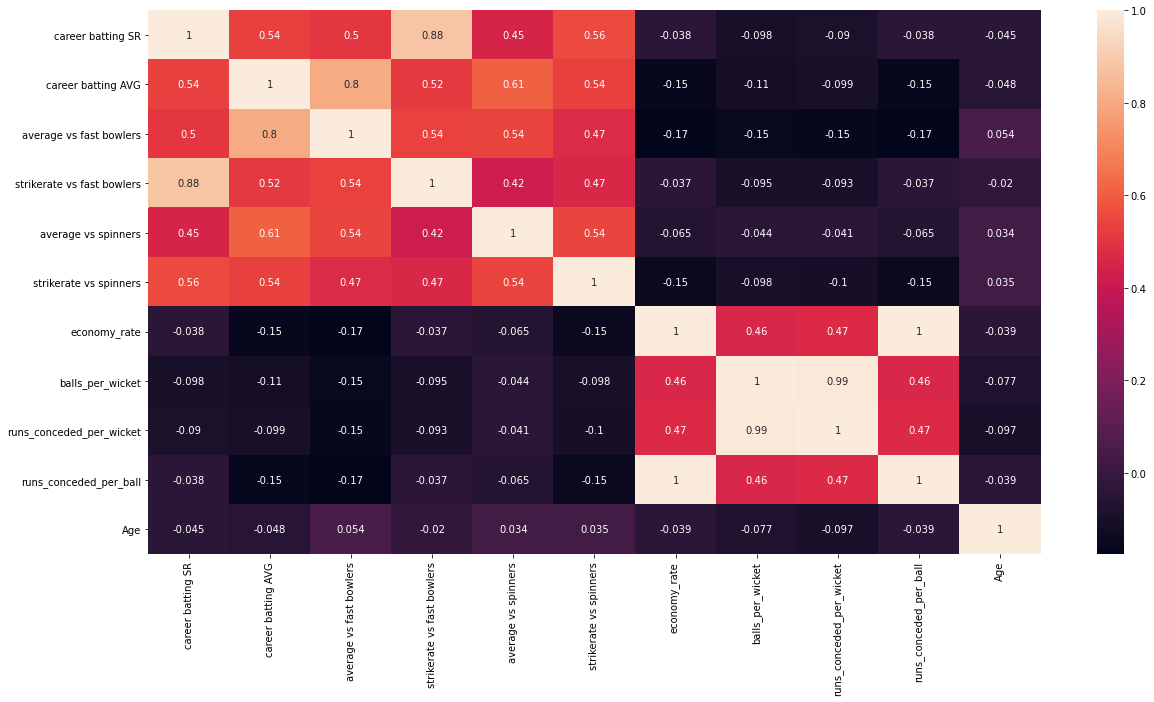

In [164]:
fig, ax = plt.subplots (1,1, figsize=(20,10))
f = hello1.loc[:,['career batting SR','career batting AVG','average vs fast bowlers','strikerate vs fast bowlers','average vs spinners','strikerate vs spinners','economy_rate','balls_per_wicket','runs_conceded_per_wicket','runs_conceded_per_ball','Age']].corr()
sns.heatmap(f, annot=True, ax=ax)

In [165]:
forxgb=hello1.loc[:,['career batting SR','career batting AVG','economy_rate','balls_per_wicket','runs_conceded_per_wicket','Age','Rating','Buy type']]
forxgb

,career batting SR,career batting AVG,economy_rate,balls_per_wicket,runs_conceded_per_wicket,Age,Rating,Buy type
0,128.301477,38.357143,8.431818,66.000000,92.750000,32,7.18,Good Buy
1,133.902077,33.633540,7.348387,37.200000,45.560000,34,8.33,Excellent Purchase
2,139.206474,45.194915,6.000000,0.000000,0.000000,34,7.44,Good Buy
3,128.669444,31.443114,7.877193,22.800000,29.933333,34,8.33,Excellent Purchase
4,124.898834,36.950704,8.816327,12.250000,18.000000,35,8.33,Excellent Purchase
...,...,...,...,...,...,...,...,...
533,0.000000,0.000000,9.574468,28.200000,45.000000,34,1.79,Avoid
534,0.000000,0.000000,8.642857,168.000000,242.000000,22,1.67,Avoid
535,0.000000,0.000000,8.616114,16.230769,23.307692,20,3.59,Maybe
536,0.000000,0.000000,12.428571,0.000000,0.000000,38,0.13,Avoid


In [166]:
X = forxgb.iloc[:,0:6].values

In [167]:
X

array([[128.30147698,  38.35714286,   8.43181818,  66.        ,
         92.75      ,  32.        ],
       [133.90207715,  33.63354037,   7.3483871 ,  37.2       ,
         45.56      ,  34.        ],
       [139.20647351,  45.19491525,   6.        ,   0.        ,
          0.        ,  34.        ],
       ...,
       [  0.        ,   0.        ,   8.61611374,  16.23076923,
         23.30769231,  20.        ],
       [  0.        ,   0.        ,  12.42857143,   0.        ,
          0.        ,  38.        ],
       [  0.        ,   0.        ,   9.05060241,  18.86363636,
         28.45454545,  23.        ]])

In [168]:
Y = forxgb.iloc[:,7].values
Y

array(['Good Buy', 'Excellent Purchase', 'Good Buy', 'Excellent Purchase',
       'Excellent Purchase', 'Excellent Purchase', 'Good Buy', 'Good Buy',
       'Good Buy', 'Good Buy', 'Excellent Purchase', 'Excellent Purchase',
       'Good Buy', 'Good Buy', 'Good Buy', 'Excellent Purchase',
       'Excellent Purchase', 'Good Buy', 'Maybe', 'Excellent Purchase',
       'Excellent Purchase', 'Good Buy', 'Good Buy', 'Good Buy',
       'Good Buy', 'Good Buy', 'Excellent Purchase', 'Good Buy',
       'Good Buy', 'Good Buy', 'Good Buy', 'Excellent Purchase', 'Maybe',
       'Good Buy', 'Good Buy', 'Good Buy', 'Excellent Purchase',
       'Good Buy', 'Good Buy', 'Good Buy', 'Good Buy', 'Good Buy',
       'Good Buy', 'Good Buy', 'Good Buy', 'Good Buy', 'Good Buy',
       'Good Buy', 'Good Buy', 'Excellent Purchase', 'Maybe',
       'Excellent Purchase', 'Excellent Purchase', 'Good Buy',
       'Excellent Purchase', 'Good Buy', 'Excellent Purchase',
       'Excellent Purchase', 'Good Buy', 'Good 

In [170]:
from sklearn.preprocessing import LabelEncoder


In [172]:
le= LabelEncoder()
Y= le.fit_transform(Y)
Y

array([2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 3, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 3, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 2, 1,
       2, 3, 1, 1, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2,
       2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 3, 1, 2, 1, 3, 2, 2, 2, 3,
       3, 2, 2, 2, 1, 2, 2, 2, 3, 2, 0, 3, 2, 2, 3, 1, 3, 1, 3, 2, 2, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 2, 3, 1, 2,
       1, 3, 2, 1, 3, 2, 3, 2, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 3, 3, 1, 3,
       3, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 0, 3, 3, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2,
       3, 2, 2, 0, 2, 0, 0, 3, 0, 0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2,
       1, 3, 2, 2, 0, 3, 0, 0, 2, 0, 3, 3, 3, 2, 3, 2, 3, 0, 3, 3, 0, 2,
       2, 3, 3, 3, 0, 2, 0, 3, 3, 3, 3, 3, 2, 3, 3,

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 40)

In [177]:
model = XGBClassifier()

model.fit(X_train, Y_train)

/srv/conda/envs/notebook/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:54:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
Y_pred = model.predict(X_test)

In [181]:
from sklearn.metrics import confusion_matrix
CM1 = confusion_matrix(Y_test, Y_pred)
print (CM1)
from sklearn.metrics import accuracy_score
print(round(accuracy_score(Y_test, Y_pred),2)*100,"% Accuracy")

[[26  0  0  6]
 [ 0 10  8  0]
 [ 0  4 46 10]
 [ 2  0  4 46]]
79.0 % Accuracy


In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [183]:
Rand_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [184]:
rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(X_train,Y_train)

RandomForestClassifier(random_state=6)

In [185]:
Rand_search = RandomizedSearchCV(estimator=rand_clf,param_distributions=Rand_param,cv=5,n_jobs =-1,verbose = 3)

In [186]:
Rand_search.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=18, max_features=log2, min_samples_leaf=9, min_samples_split=6, n_estimators=115; total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=115; total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=6),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]},
                   verbose=3)

In [187]:
Rand_search.best_params_

{'n_estimators': 130,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 16,
 'criterion': 'entropy'}

In [188]:
rand_clf = RandomForestClassifier(n_estimators=130,
 min_samples_split=4,
 min_samples_leaf=4,
 max_features= 'log2',
 max_depth= 16,
 criterion= 'entropy')

In [189]:
rand_clf.fit(X_train,Y_train)


RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2',
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=130)

In [190]:
y_pred=rand_clf.predict(X_test)

In [191]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [192]:
acc1=accuracy_score(y_pred,Y_test)
acc1

0.808641975308642

In [193]:
cm_for_rand_clf=confusion_matrix(y_pred,Y_test)
cm_for_rand_clf

array([[21,  0,  0,  2],
       [ 0, 14,  4,  0],
       [ 0,  4, 48,  2],
       [11,  0,  8, 48]])

In [194]:
test_score = round(accuracy_score(Y_test,model.predict(X_test)),2) * 100
testing_and_training_score = pd.DataFrame(data=[["XGBOOST classifier",test_score]],
                                          columns=['model','testing accuracy %'])
testing_and_training_score

,model,testing accuracy %
0,XGBOOST classifier,79.0


In [195]:
test_score1 = round(accuracy_score(Y_test,rand_clf.predict(X_test)),2) * 100
testing_and_training_score1 = pd.DataFrame(data=[["Random forest classifier", test_score1]],
                                          columns=['model','testing accuracy %'])
testing_and_training_score1

,model,testing accuracy %
0,Random forest classifier,81.0


In [196]:
testing_and_training_score = testing_and_training_score.append(testing_and_training_score1,ignore_index=True)
testing_and_training_score

,model,testing accuracy %
0,XGBOOST classifier,79.0
1,Random forest classifier,81.0


In [197]:
import pickle as pkl

In [198]:

with open(r'E:\save'+ '/model1ForPrediction.pkl', 'wb') as f:
    pickle.dump(rand_clf,f)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\save/model1ForPrediction.pkl'